<h1><font color = blue>What is our project</h1><br>
As the premier men's professional basketball league in the world, one of the four major North American professional sports leagues, NBA has huge influence around the world. There are 33.93 million NBA fans, and 22million Los Angeles Lakers fans on Facebook. NBA has 30 teams in total, 15 in each conference (eastern conference and western conference), 5 in each division (Atlantic, Central, Southeast in East and Northwest, Pacific and Southwest in West). Our project focus on the data in NBA players, teams, coaches, fans, stadiums and etc. 

<h1><font color = blue>Source of data</h1><br>
* We collect our social medias data from tweeter, Facebook, Google+ (Three members team, three social medias)<br>
* And the original information of the nine entities like players, teams, coaches are from websites like this one:<br> https://www.basketball-reference.com/referees/

<h1><font color = blue>How does our database look like</h1><br>

* We have nine tables concerning the nine entities we chose to describe in the NBA domain, which are players, coaches, teams, fans, stadiums, sneakers, games, awards, and drafts.<br>
* Aside from that, we have social media data of posts and trends as tables and the associated domain tags table, as well as synonyms, mis-spellings, and semantic tables of the tags.<br>


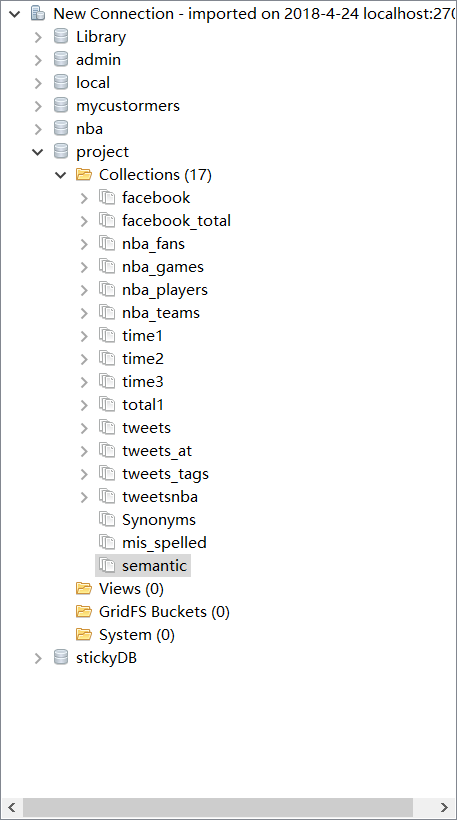

<h2><font color = blue>Collect Data from Tweepy</h2><br>
<h3><font color=pink>Importing the packages for future use</h3>
We are going to use Panda Dataframe to store our data, csv package to transform social media data from data frame to csv file, finally pymongo package for importing data into MongoDB 

In [ ]:
import pymysql
import tweepy
import json
from dateutil import parser
import pandas as pd
import re
import pymysql
import sqlalchemy
import numpy as np  
import twitter 
from pandas.io import sql
import csv
import json
import pandas as pd
import sys, getopt, pprint
from pymongo import MongoClient

<h3><font color=pink>Set the keys and tokens for connecting to Tweepy</h3>
Go to http://dev.twitter.com/apps/new to create an app and get values

In [ ]:
consumer_key= 'uzHA74JKJ3woXVnXZBBMjt3PN'
consumer_secret= 'kTuWm8ltScWibokVSeLmAat5RZuti4mSyQF8g4IVrb95Xz8lFh'
access_token= '4924562533-UIsWAAvLF8svY2RmDEpZKAlPGwq79p4kg2UeExc'
access_token_secret= 'MNLUH1cQaiPDXprTJYJD4yNcGLdXh9FKvJ2QeLCd4KLgc'

<h3><font color=pink>Collecting data</h3>
collecting tweets, user id, time when the tweet was created, time zone of the user, count of retweet, count of like, and the hashtags included in the post text. Then save the data into csv file named raw_data.csv

<div class="alert alert-block alert-info">use the try and except function to avoid 429 error (Giving too many request)</div>

In [ ]:
try:
    #connecting to tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)

    # Open/Create a file to append data.
    #If the file doesn’t exist, create it; if the file already exist, then replace it with the new file created
    csvFile = open('raw_data.csv', 'a')
    #Use csv Writer
    csvWriter = csv.writer(csvFile)

    #use the for function to collecte the data and write it into csv file line by line
    for tweet in tweepy.Cursor(api.search,
                               q="NBA",
                               #count=5000,
  
                               since="2018-04-11",
                               until="2018-04-15",
                               lang="en").items(500):
        print (tweet.id, tweet.user.time_zone,tweet.created_at, tweet.text,tweet.retweet_count,tweet.favorite_count, tweet.entities.get('hashtags'))
        csvWriter.writerow([tweet.id, tweet.user.time_zone, tweet.created_at,tweet.favorite_count,tweet.retweet_count,tweet.text.encode('utf-8'), tweet.entities.get('hashtags')])
        #csvFile.close()

except tweepy.error.TweepError:
          raise

<h3>**Raw Data**</h3>

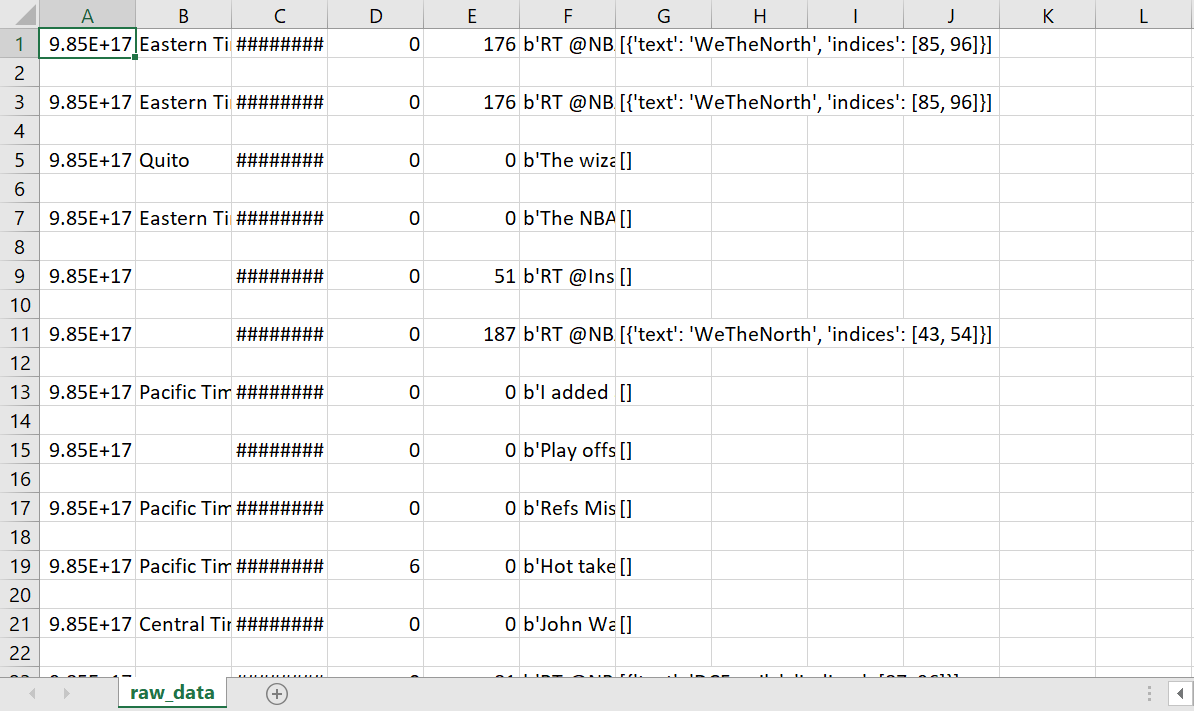
<br>
<br>
<font color=blue>_Notice that the raw data scripted from the social media is not in a proper format to be used as the data source for MongoDB. There are blank rows between each line of data, and we can eliminate them by the help of Excel._

<h3>**Audit Data**</h3>
go to Find and Select >>>> Go to Special >>>> select the Blank, then all the blank row will be selected, then you can chose to delete all the selected rows
<br>
<br>
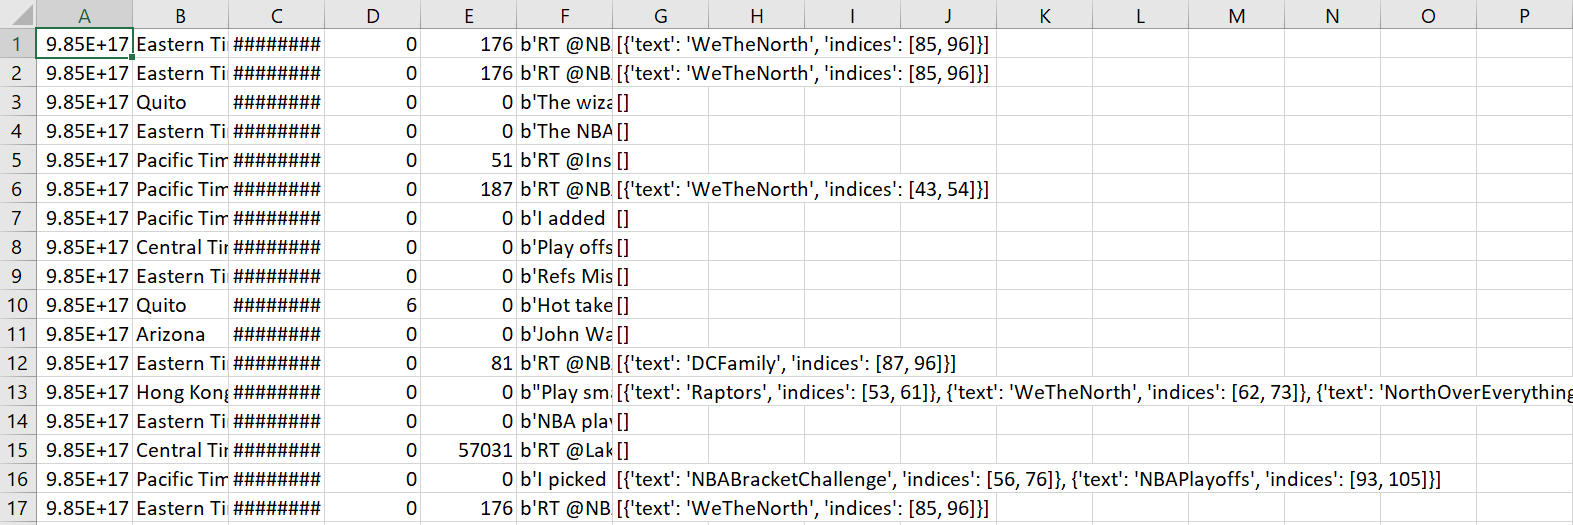

<br>
<font color=blue>Now the data.csv file is ready to be imported into MongoDB!

<h2>Collect Data from Google+</h2><br>
Create "trending_data" dataframe as our container to store Google+ trends data<br>
Put the trending data about basketball players in february 2018 in "trending_data"

In [4]:
from pytrends.request import TrendReq


# Login to Google. Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

trending_data = pytrend.top_charts(cid='basketball_players', date=201802)
trending_data['time'] = 201802
trending_data

delta                    deltaSummary  \
0     0.0  <b>Same rank</b> as last month   
1     0.0  <b>Same rank</b> as last month   
2     1.0      <b>+1</b> since last month   
3     5.0      <b>+5</b> since last month   
4    -2.0      <b>-2</b> since last month   
5     NaN             <b>New</b> in chart   
6     1.0      <b>+1</b> since last month   
7    -1.0      <b>-1</b> since last month   
8    -3.0      <b>-3</b> since last month   
9     NaN             <b>New</b> in chart   
10    0.0  <b>Same rank</b> as last month   
11   -2.0      <b>-2</b> since last month   
12   -8.0      <b>-8</b> since last month   
13   -1.0      <b>-1</b> since last month   
14   -3.0      <b>-3</b> since last month   
15    NaN             <b>New</b> in chart   
16    3.0      <b>+3</b> since last month   
17    NaN             <b>New</b> in chart   
18    NaN             <b>New</b> in chart   
19    NaN             <b>New</b> in chart   

                                          description  \
0   {'description': 'LeBron Raymone James Sr. is a...   
1   {'description': 'Wardell Stephen Curry II is a...   
2   {'description': 'Michael Jeffrey Jordan, also ...   
3   {'description': 'Isaiah Jamar Thomas is an Ame...   
4   {'description': 'Lonzo Anderson Ball is an Ame...   
5   {'description': 'Dwyane Tyrone Wade Jr. is an ...   
6   {'description': 'Shaquille Rashaun O'Neal, nic...   
7   {'description': 'Kobe Bean Bryant is an Americ...   
8   {'description': 'Kyrie Andrew Irving is an Ame...   
9   {'description': 'Derrick Martell Rose is an Am...   
10  {'description': 'Russell Westbrook III is an A...   
11  {'description': 'Kevin Wayne Durant is an Amer...   
12  {'description': 'Blake Austin Griffin is an Am...   
13  {'description': 'James Edward Harden Jr. is an...   
14  {'description': 'Benjamin David Simmons is an ...   
15  {'description': 'Jimmy Butler III is an Americ...   
16  {'description': 'Giannis Antetokounmpo is a Gr...   
17  {'description': 'Kawhi Anthony Leonard is an A...   
18  {'description': 'Jordan Taylor Clarkson is a F...   
19  {'description': 'Larry Donnell Nance Jr. is an...   

                                           exploreUrl hotnessColor  \
0   /trends/explore?q=/m/01jz6d&date=2018-2-1+2018...      #d04108   
1   /trends/explore?q=/m/0dw15r&date=2018-2-1+2018...      #f0a049   
2   /trends/explore?q=/m/054c1&date=2018-2-1+2018-...      #f0a049   
3   /trends/explore?q=/m/05f7g9d&date=2018-2-1+201...      #f0a049   
4   /trends/explore?q=Lonzo+Ball&date=2018-2-1+201...      #f0a049   
5   /trends/explore?q=/m/03l295&date=2018-2-1+2018...      #f0a049   
6   /trends/explore?q=/m/012xdf&date=2018-2-1+2018...      #f0a049   
7   /trends/explore?q=/m/01kmd4&date=2018-2-1+2018...      #f0a049   
8   /trends/explore?q=/m/0ch52p4&date=2018-2-1+201...      #f0a049   
9   /trends/explore?q=/m/0283v6h&date=2018-2-1+201...      #f0a049   
10  /trends/explore?q=/m/03y9ygn&date=2018-2-1+201...      #feca65   
11  /trends/explore?q=/m/0gxrc1&date=2018-2-1+2018...      #feca65   
12  /trends/explore?q=/m/02qhzxp&date=2018-2-1+201...      #feca65   
13  /trends/explore?q=/m/03wbkl5&date=2018-2-1+201...      #feca65   
14  /trends/explore?q=/m/0104v5dm&date=2018-2-1+20...      #feca65   
15  /trends/explore?q=/m/05n_5s_&date=2018-2-1+201...      #feca65   
16  /trends/explore?q=/m/0pdnj7h&date=2018-2-1+201...      #feca65   
17  /trends/explore?q=/m/0gh6pc6&date=2018-2-1+201...      #feca65   
18  /trends/explore?q=/m/0w73rsl&date=2018-2-1+201...      #feca65   
19  /trends/explore?q=/m/0w5bm9k&date=2018-2-1+201...      #feca65   

    hotnessLevel          idForTracking  isNew                peakRankSummary  \
0              5           LeBron James  False  Peaked at <b>#1</b> (monthly)   
1              2          Stephen Curry  False  Peaked at <b>#1</b> (monthly)   
2              2         Michael Jordan  False  Peaked at <b>#1</b> (monthly)   
3              2          Isaiah Thomas  False  Peaked at <b>#3</

<h2>Define the function to append data to dataframe</h2>
* We plan to store trending data of multiple months in our data frame.<br>
* The function defined below can take in the parameter of what topic we want to search about ( seed) and which month of the data (month), and then automatically append the data we required into "trending_data" mentioned earlier.<br>
* Note that trending['time'] = month can add an column of "time" into database and insert the coherent month

In [5]:
def search_concat(seed, month):
    global trending_data
    trending = pytrend.top_charts(cid=seed, date=month)
    trending['time'] = month
    trending_data = trending_data.append(trending)

<h2>Collecting more data</h2>
Call search_concat function to get more data

In [6]:
inpute={
    ('basketball_players', 201801),
    ('basketball_players', 201712),
    ('basketball_players', 201711),
    ('basketball_players', 201710),
    ('basketball_players', 201709),
    ('basketball_players', 201708),
    ('basketball_players', 201707),
    ('basketball_teams', 201802),
    ('basketball_teams', 201801),
    ('basketball_teams', 201712),
    ('basketball_teams', 201711),
    ('basketball_teams', 201710),
    ('basketball_teams', 201709),
    ('basketball_teams', 201708),
    ('basketball_teams', 201707),
}

for seed, month in inpute:
    search_concat(seed, month)
    
trending_data

delta                    deltaSummary  \
0     0.0  <b>Same rank</b> as last month   
1     0.0  <b>Same rank</b> as last month   
2     1.0      <b>+1</b> since last month   
3     5.0      <b>+5</b> since last month   
4    -2.0      <b>-2</b> since last month   
5     NaN             <b>New</b> in chart   
6     1.0      <b>+1</b> since last month   
7    -1.0      <b>-1</b> since last month   
8    -3.0      <b>-3</b> since last month   
9     NaN             <b>New</b> in chart   
10    0.0  <b>Same rank</b> as last month   
11   -2.0      <b>-2</b> since last month   
12   -8.0      <b>-8</b> since last month   
13   -1.0      <b>-1</b> since last month   
14   -3.0      <b>-3</b> since last month   
15    NaN             <b>New</b> in chart   
16    3.0      <b>+3</b> since last month   
17    NaN             <b>New</b> in chart   
18    NaN             <b>New</b> in chart   
19    NaN             <b>New</b> in chart   
0     1.0      <b>+1</b> since last month   
1     NaN             <b>New</b> in chart   
2     0.0  <b>Same rank</b> as last month   
3     0.0  <b>Same rank</b> as last month   
4     0.0  <b>Same rank</b> as last month   
5     4.0      <b>+4</b> since last month   
6    -1.0      <b>-1</b> since last month   
7    -1.0      <b>-1</b> since last month   
8     0.0  <b>Same rank</b> as last month   
9     NaN             <b>New</b> in chart   
..    ...                             ...   
10   -4.0      <b>-4</b> since last month   
11    1.0      <b>+1</b> since last month   
12   -2.0      <b>-2</b> since last month   
13    5.0      <b>+5</b> since last month   
14   -5.0      <b>-5</b> since last month   
15    NaN             <b>New</b> in chart   
16    NaN             <b>New</b> in chart   
17    NaN             <b>New</b> in chart   
18    NaN             <b>New</b> in chart   
19   -3.0      <b>-3</b> since last month   
0     0.0  <b>Same rank</b> as last month   
1     1.0      <b>+1</b> since last month   
2     1.0      <b>+1</b> since last month   
3    -2.0      <b>-2</b> since last month   
4     0.0  <b>Same rank</b> as last month   
5     0.0  <b>Same rank</b> as last month   
6     1.0      <b>+1</b> since last month   
7     1.0      <b>+1</b> since last month   
8    -2.0      <b>-2</b> since last month   
9     8.0      <b>+8</b> since last month   
10   -1.0      <b>-1</b> since last month   
11    1.0      <b>+1</b> since last month   
12    NaN             <b>New</b> in chart   
13    2.0      <b>+2</b> since last month   
14    4.0      <b>+4</b> since last month   
15   -5.0      <b>-5</b> since last month   
16    NaN             <b>New</b> in chart   
17    2.0      <b>+2</b> since last month   
18    NaN             <b>New</b> in chart   
19    NaN             <b>New</b> in chart   

                                          description  \
0   {'description': 'LeBron Raymone James Sr. is a...   
1   {'description': 'Wardell Stephen Curry II is a...   
2   {'description': 'Michael Jeffrey Jordan, also ...   
3   {'description': 'Isaiah Jamar Thomas is an Ame...   
4   {'description': 'Lonzo Anderson Ball is an Ame...   
5   {'description': 'Dwyane Tyrone Wade Jr. is an ...   
6   {'description': 'Shaquille Rashaun O'Neal, nic...   
7   {'description': 'Kobe Bean Bryant is an Americ...   
8   {'description': 'Kyrie Andrew Irving is an Ame...   
9   {'description': 'Derrick Martell Rose is an Am...   
10  {'description': 'Russell Westbrook III is an A...   
11  {'description': 'Kevin Wayne Durant is an Amer...   
12  {'description': 'Blake Austin Griffin is an Am...   
13  {'description': 'James Edward Harden Jr. is an...   
14  {'description': 'Benjamin David Simmons is an ...   
15  {'description': 'Jimmy Butler III is an Americ...   
16  {'description': 'Giannis Antetokounmpo is a Gr...   
17  {'description': 'Kawhi Anthony Leonard is an A...   
18  {'description': 'Jordan Taylor Clarkson is a F...   
19  {'description': 'Larry Donnell Nance Jr. is an...   
0   {'descriptio

<h2>Convert dataframe into csv file for inserting into MongoDB</h2>

In [ ]:
import csv

trending_data.to_csv(path_or_buf='Google_trending_data.csv')

<h2><font color = blue>Import CSV data into MongoDB</h2>

<h3><font color=pink>Open the data source file</font></h3>
Open the csv file data.csv which has the source data stored in, save the data in to "reader"

In [ ]:
csvfile = open('data.csv','r')
reader = csv.DictReader(csvfile)

<h3><font color=pink>Connect to MongoDB</font></h3>
Connecting to MongoDB with the help of MongoClient from package pymongo

In [ ]:
mongo_client = MongoClient("localhost",27017)

<h3><font color=pink>get ready for importing data</font></h3>
Create new NoSQL database named "tweets"<br>
Create new collection named "tweet_info", and drop all the data in it if the collection already exist<br>
Specify the headers for the documents in the collection

In [ ]:
db = mongo_client.project_data
db.tweet_info.drop()
header = ["user_id", "time_zone", "created_at", "fav","retweet","text","tags"]

<h3><font color=pink>Writing data into MongoDB </font></h3>
Use the "for" loop to write data from "reader" to "tweets" database line by line

In [ ]:
for each in reader:
    row = {}
    for field in header:
        row[field]=each[field]
        
    db.tweet_info.insert(row)

<h2>Outcome</h2>
How does the data look like in MongoDB?

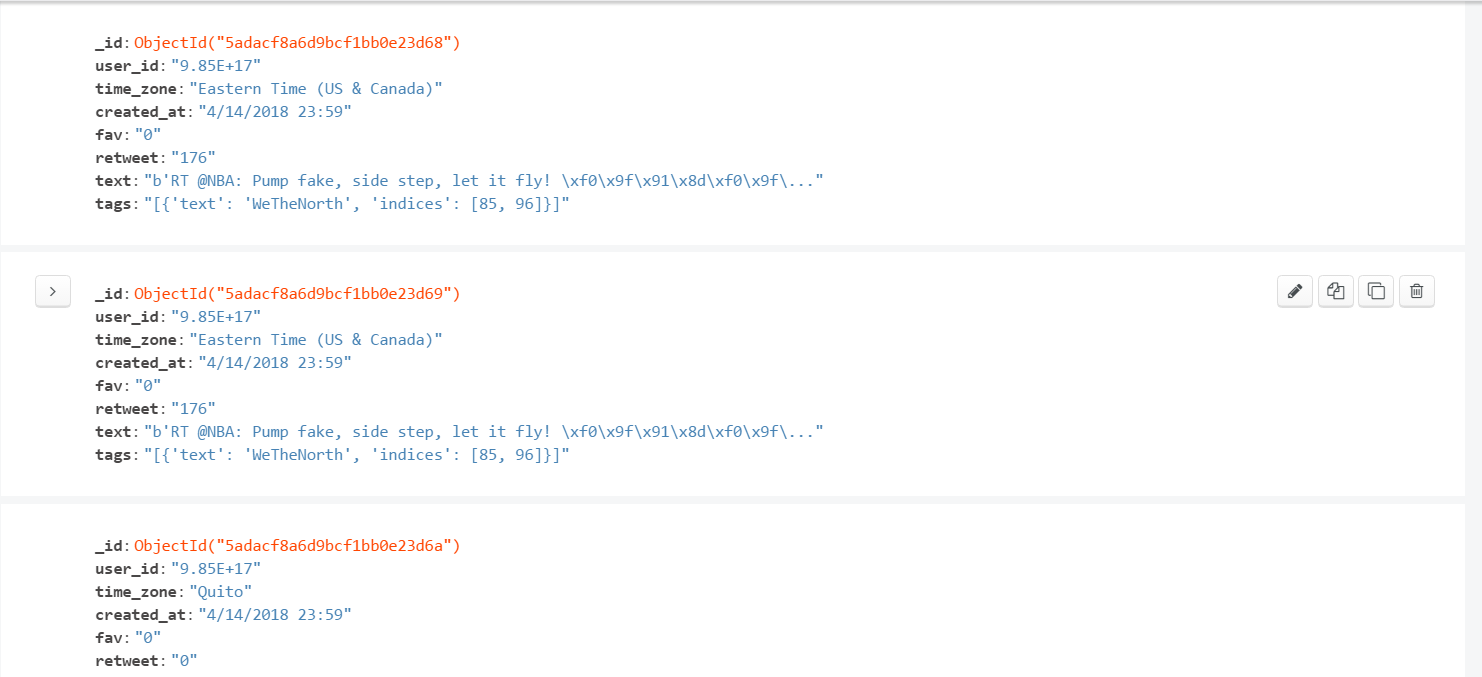
<br>
<br>
NoSQL allows an embedded structure of the database, which means we can put all the related information into one document instead of using keys to connect the pieces separated in all the tables.<br>
It is important to know that NoSQL database does not have a pre-decided schema. Each piece of data will be stored in a “document”, and the structure of document can change according to the actual information it needs to store.

<div class="alert alert-block alert-success">The Google+ trending data, Facebook data are collected and imported into MongoDB through the same process

<h1><font color = blue>Answering the Twelve Questions</h1>

<h1>i. What are people saying about me (somebody)?	(Twitter)</h1><br>


<font color = blue>If I can find all the post text that is about me, then I know what are people saying about me.<br>
Here we find all the posts that’s about “@cavs”



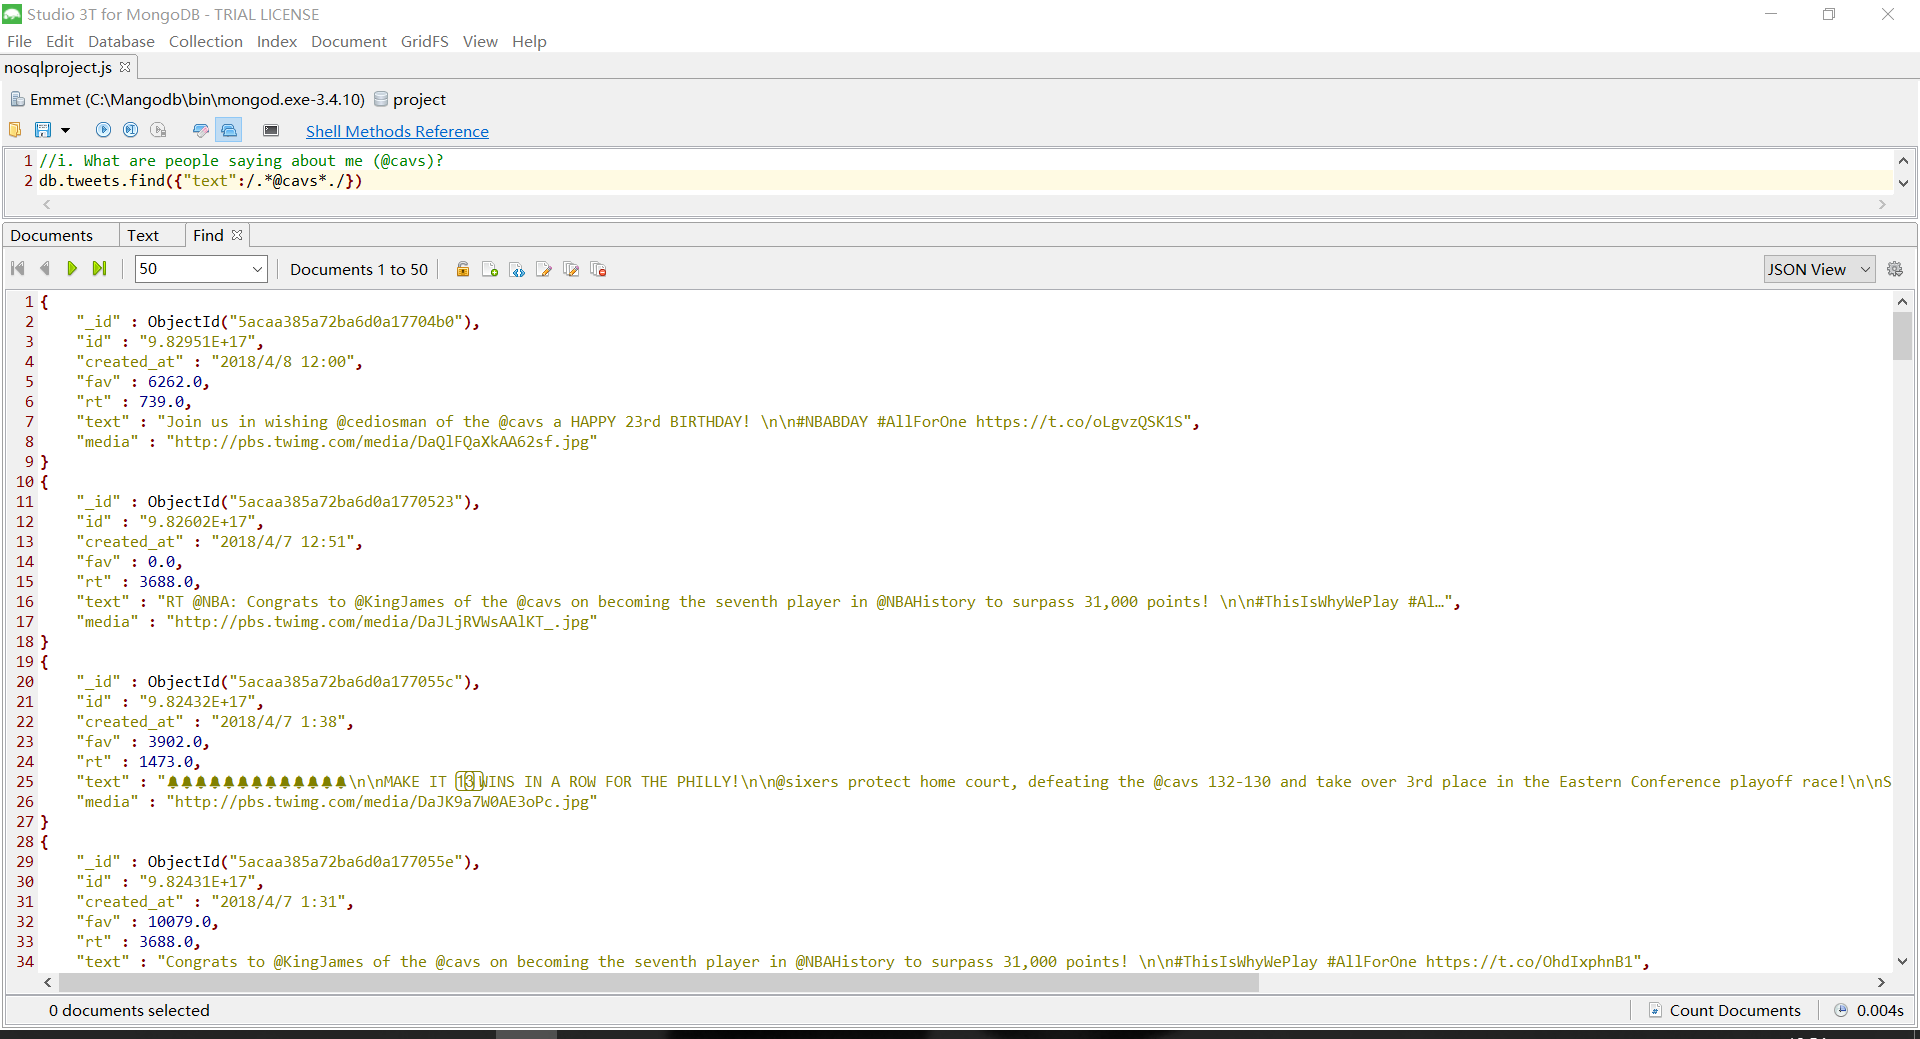

<h1>ii. How viral are my posts?	  (Facebook)</h1><br>

<font color = blue>We use data from Facebook to solve this question<br>
The count of “likes”, “comments” and “shares” can all indicate the level of being viral



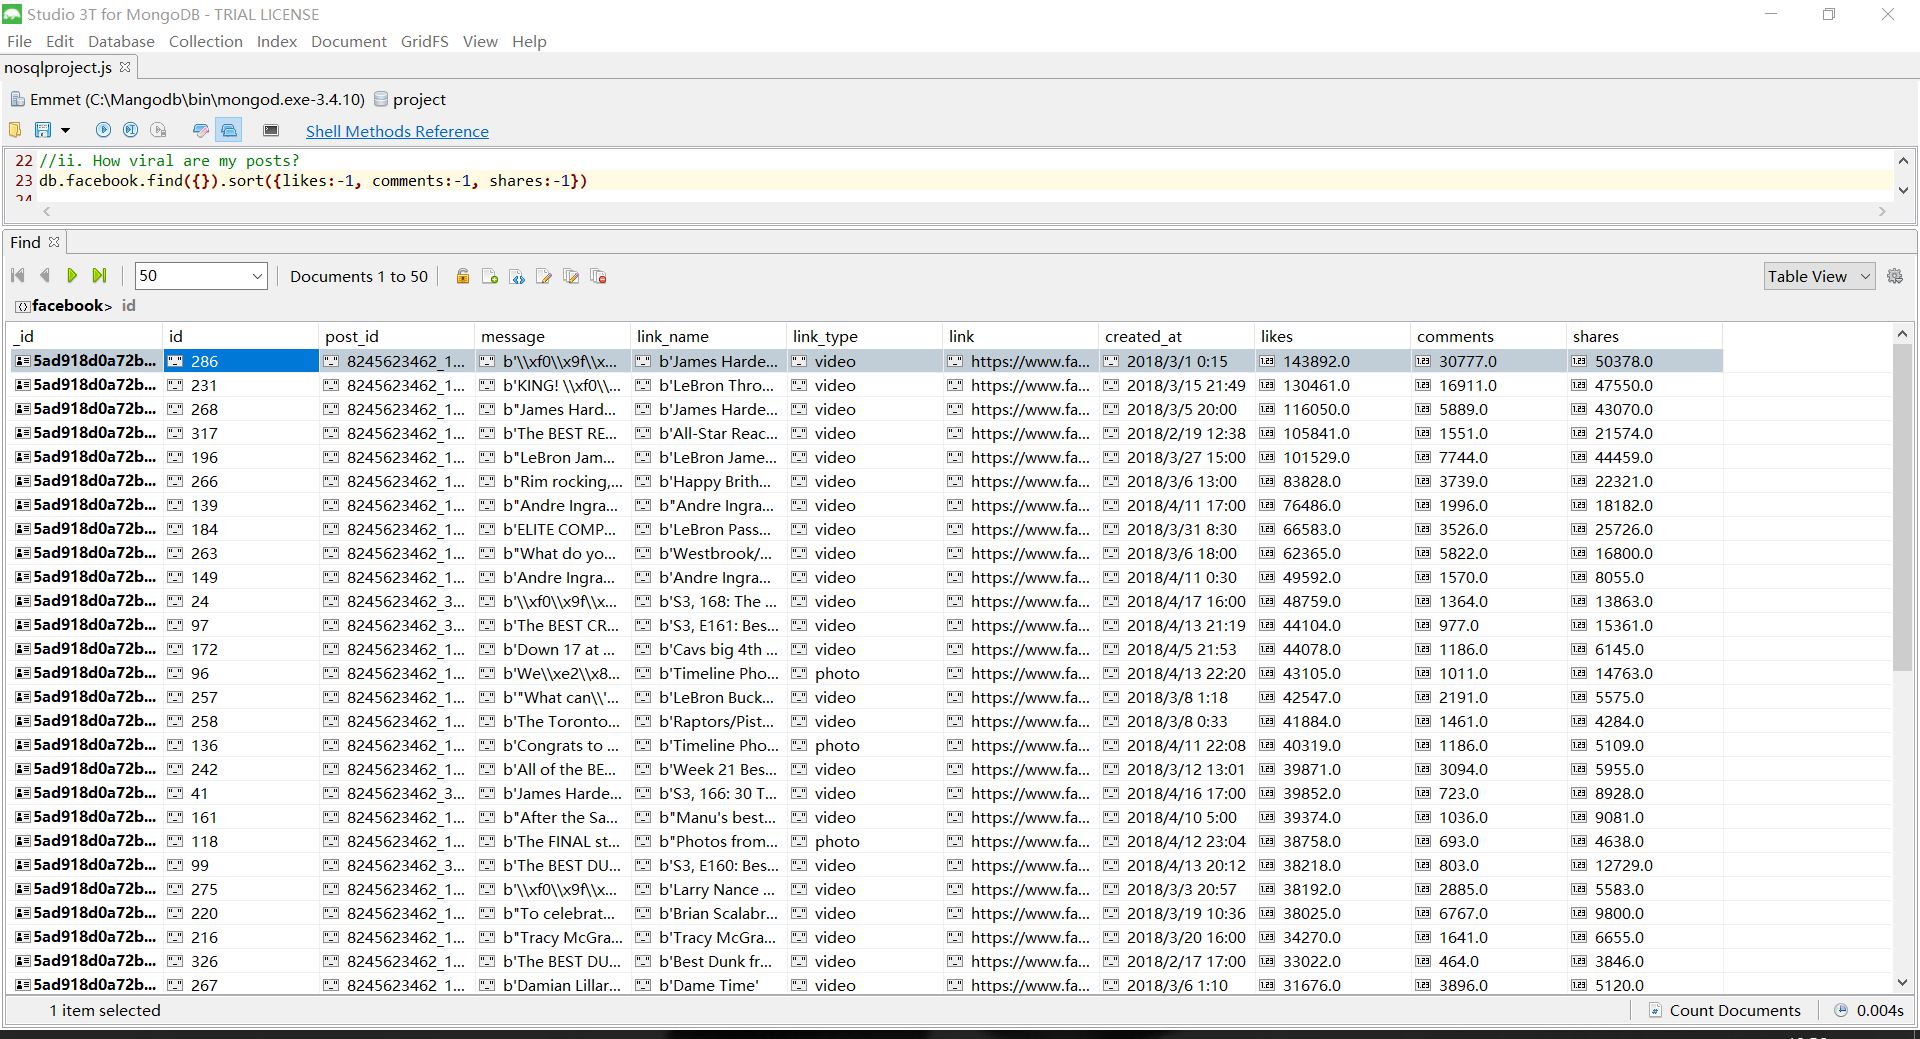

<h2>iii. How much influence to my posts have? (Facebook)

<font color = blue>
* We use data from Facebook to solve this question<br>
* The count of “likes”, “comments” and “shares” can all show the amount of influence the posts have


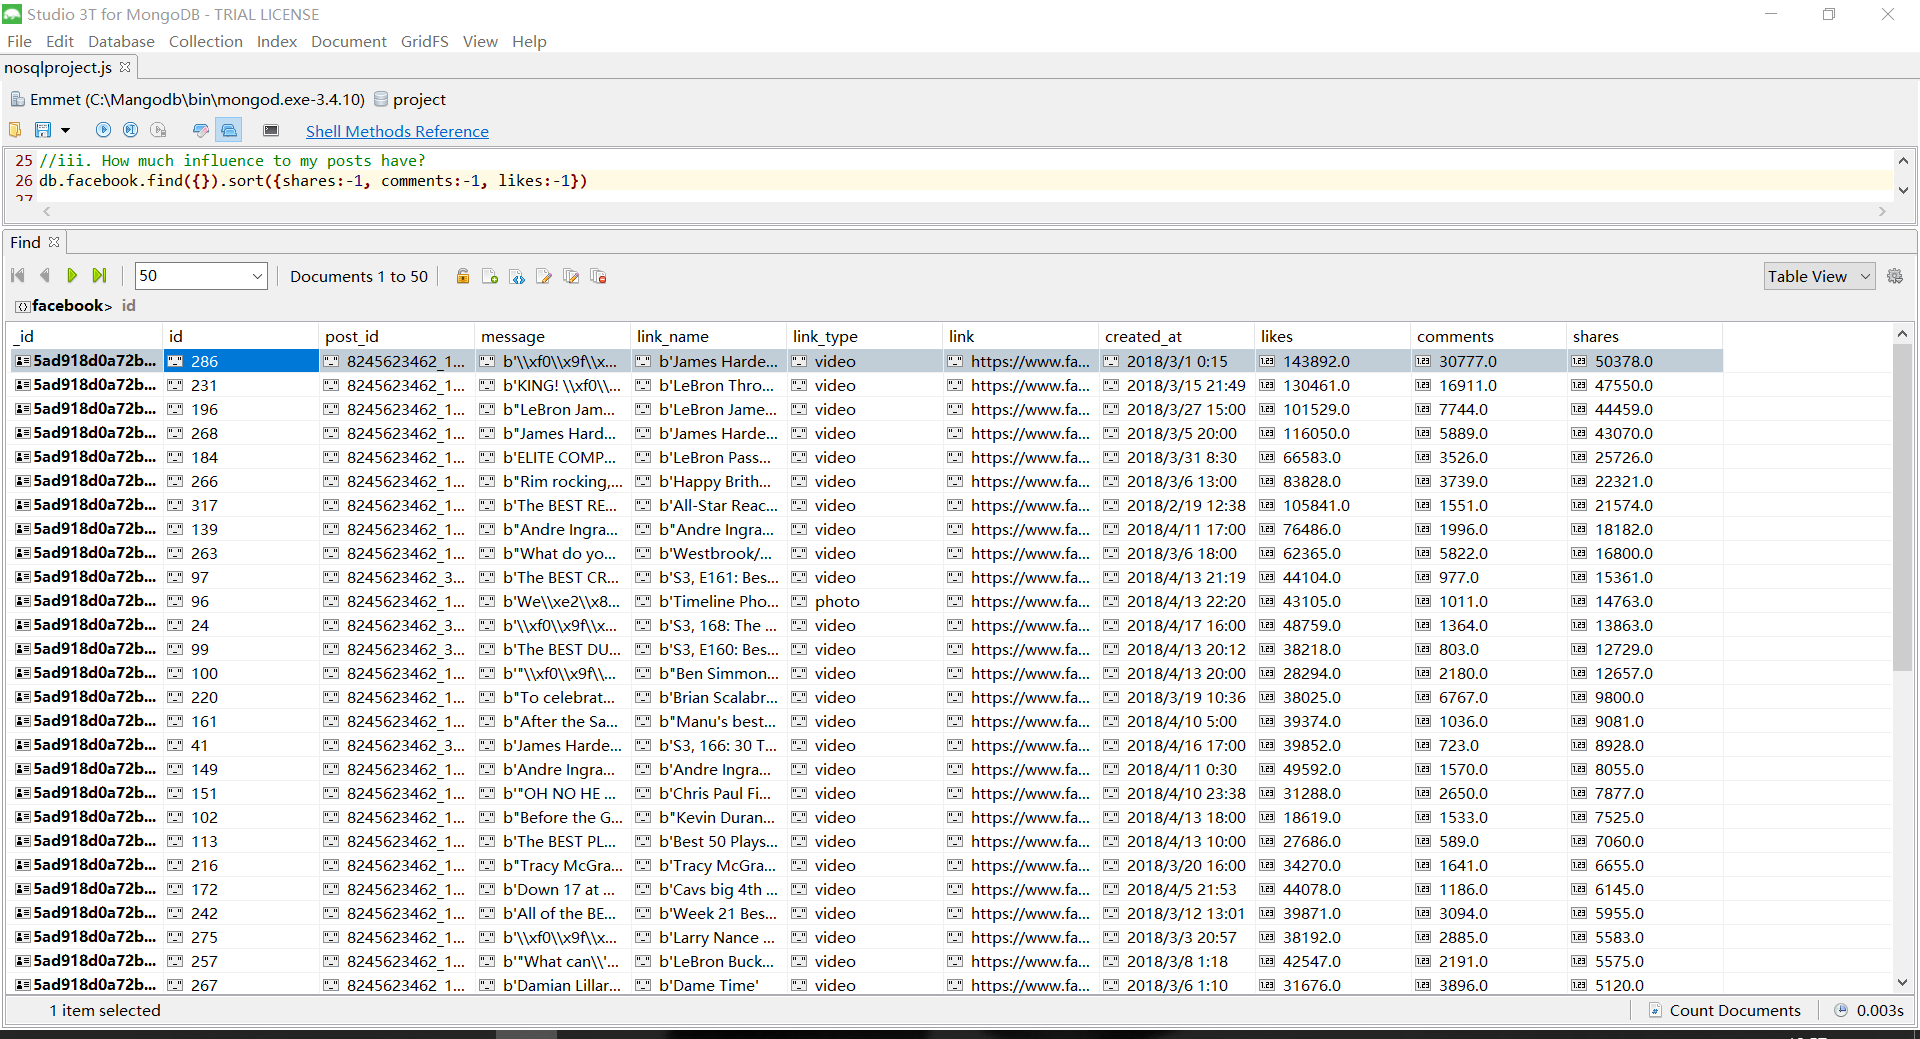

<h2>iv. What posts are like mine?（Twitter）

<font color = blue>

* We extract the tags most frequently appeared in the NBA homepage, and check out these tags in all Tweets and then we get the similar posts




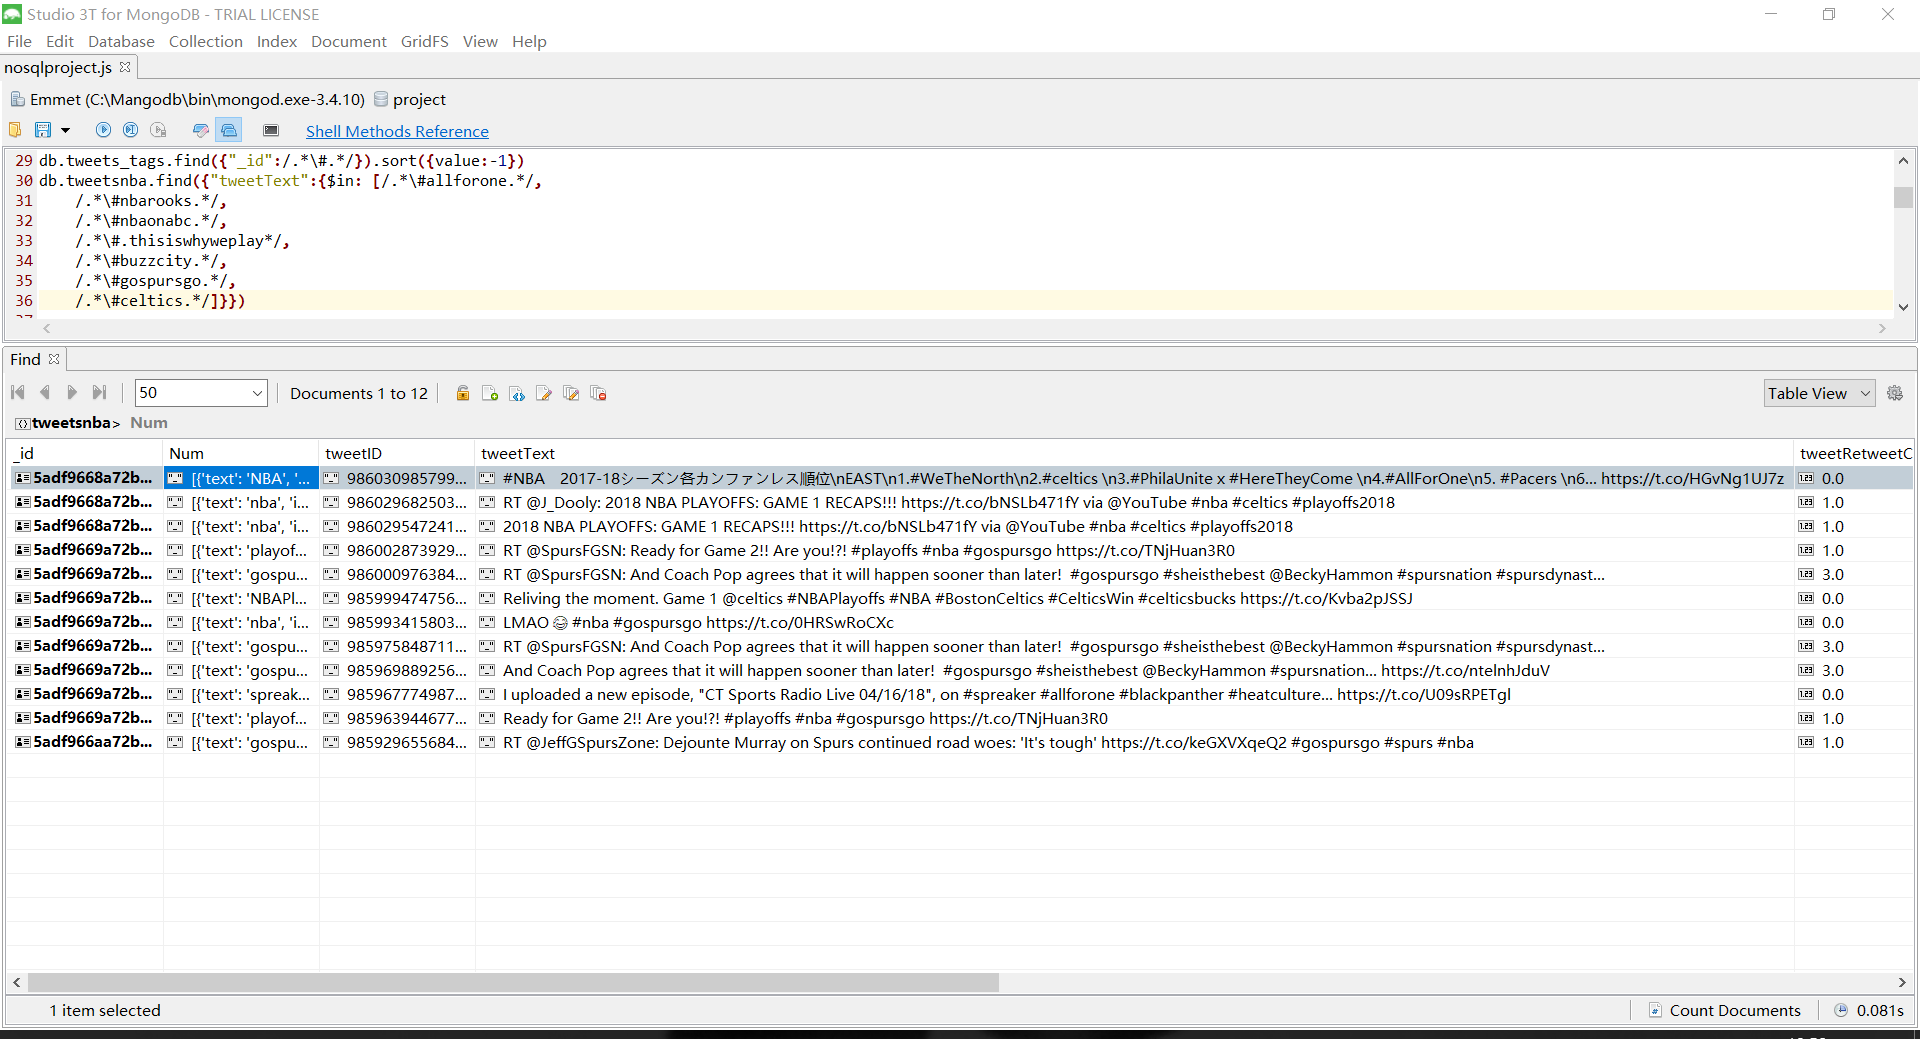

<h2>v. What users post like me?（Twitter）

<font color = blue>
* Like qiestion four, if two users frequently use the same tags, then their post habits, interests are probably similar.<br>
* Now we find __Users__ that post like NBA homepage



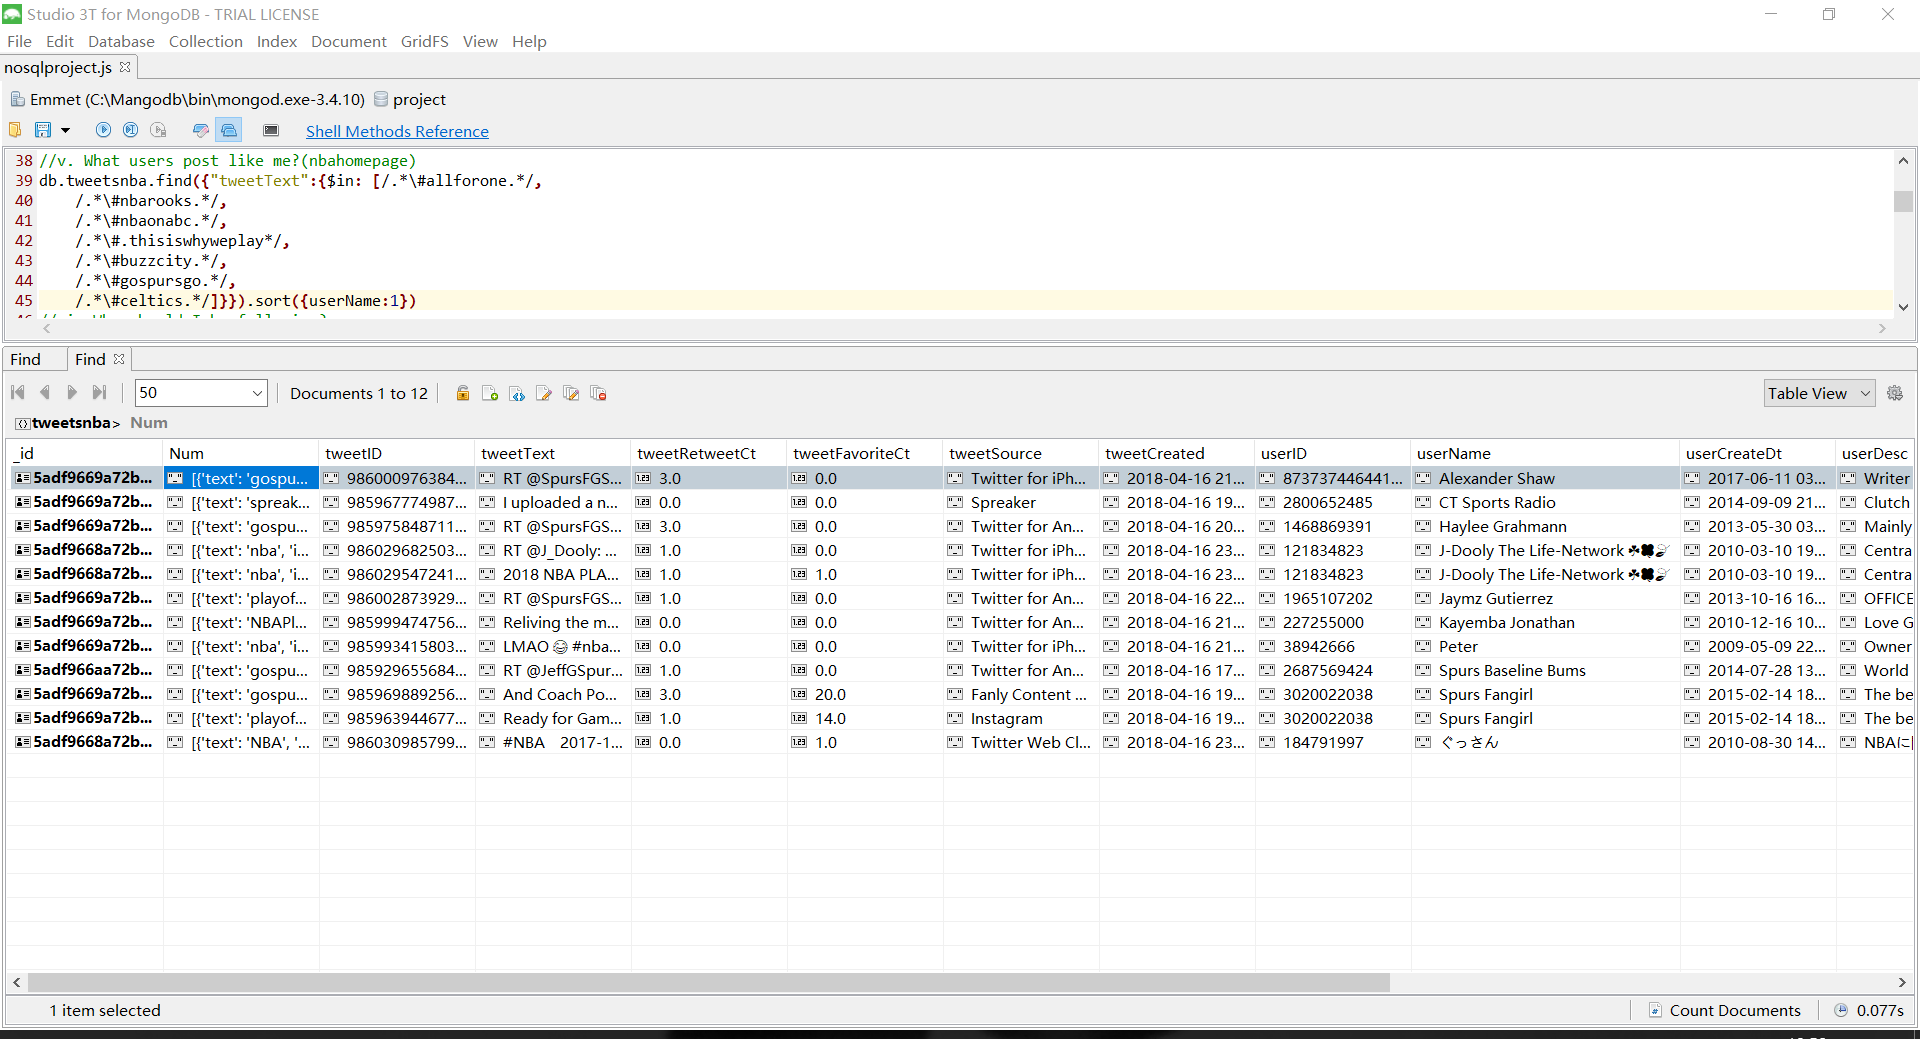

<h2>vi. Who should I be following?（Twitter）

<font color = blue>
* First I should only follow users that have similar interests with me, or in another word, follow users that post like me<br>
* Second, I should follow users that have posts with more quality, which means the influence of that user’s post should be higher than me<br>
* Find out those Users who are like me and have higher quality posts and more followers.



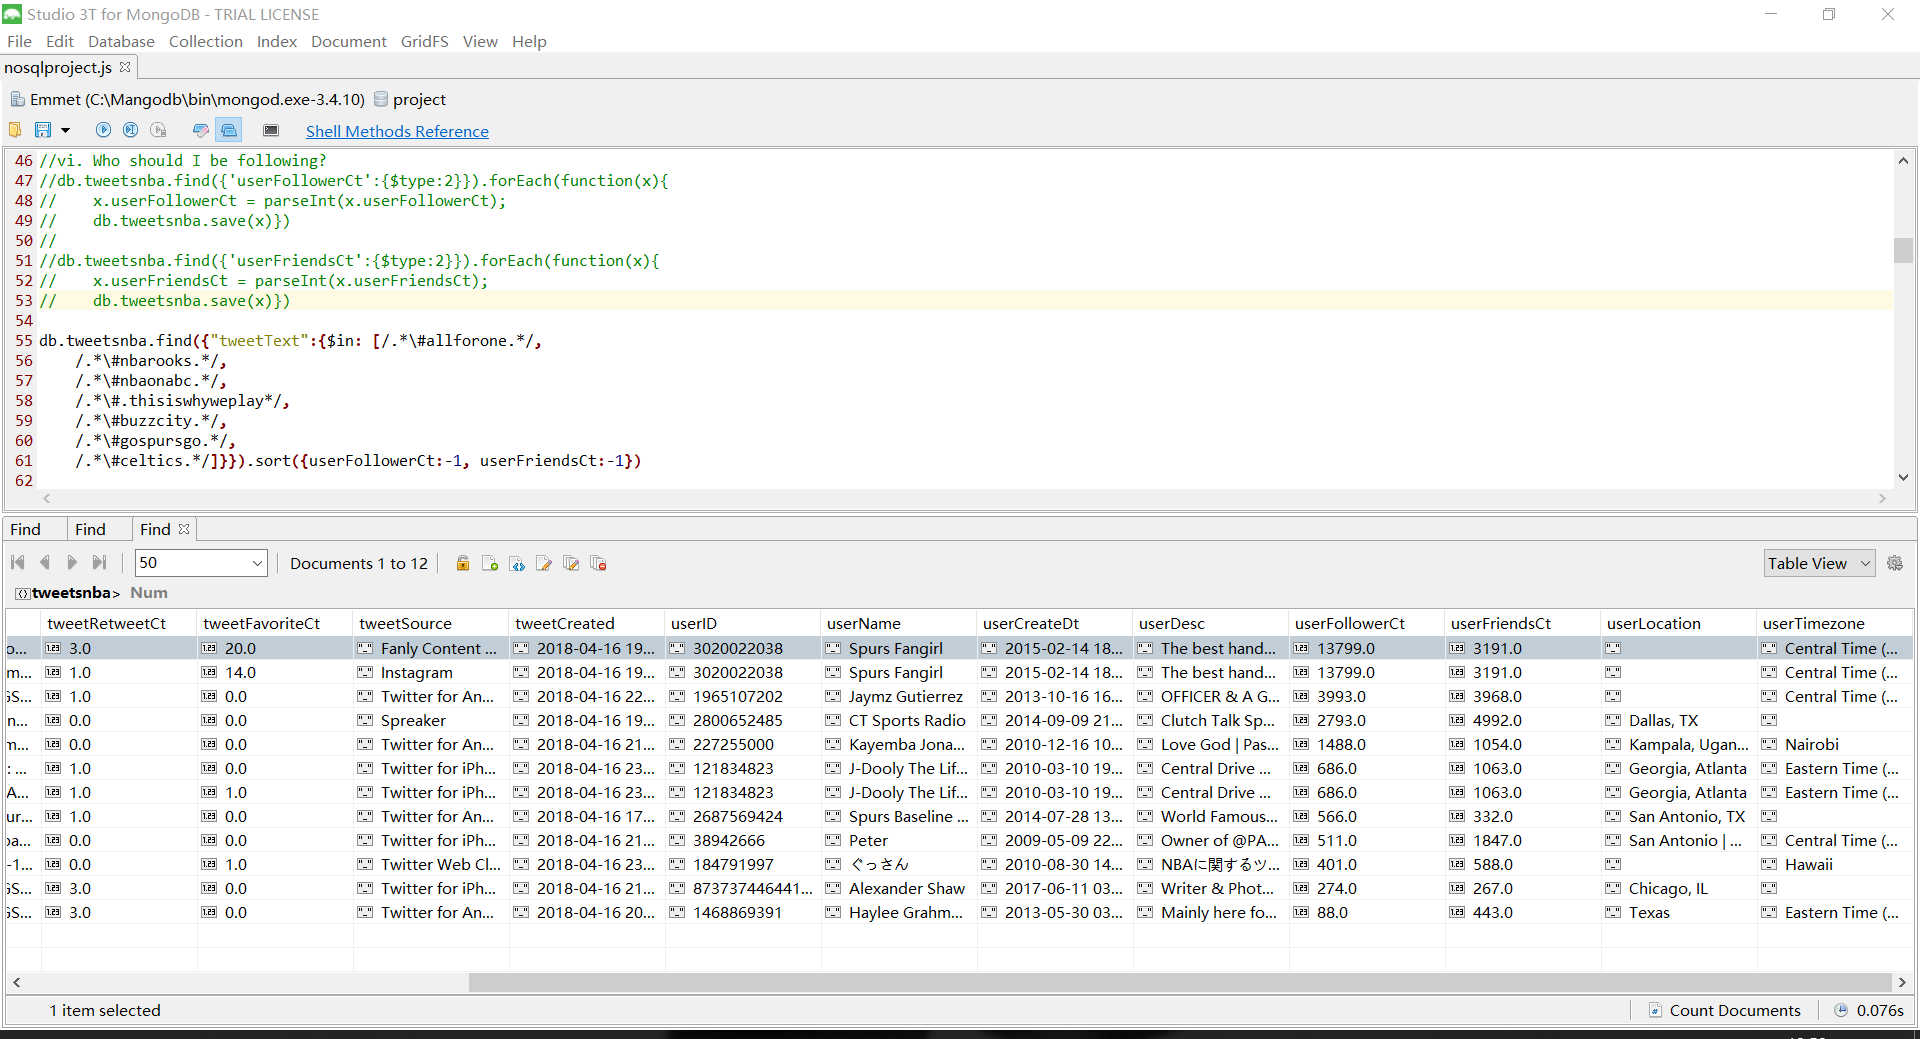

<h2>vii. What topics are trending in my domain?（Twitter

<font color = blue>
* Trends are the tags (topics) that are the most popular ones in a certain period of time<br>
* Divide all tweets into three periods based on time and count the frequency of tags from the three different periods.



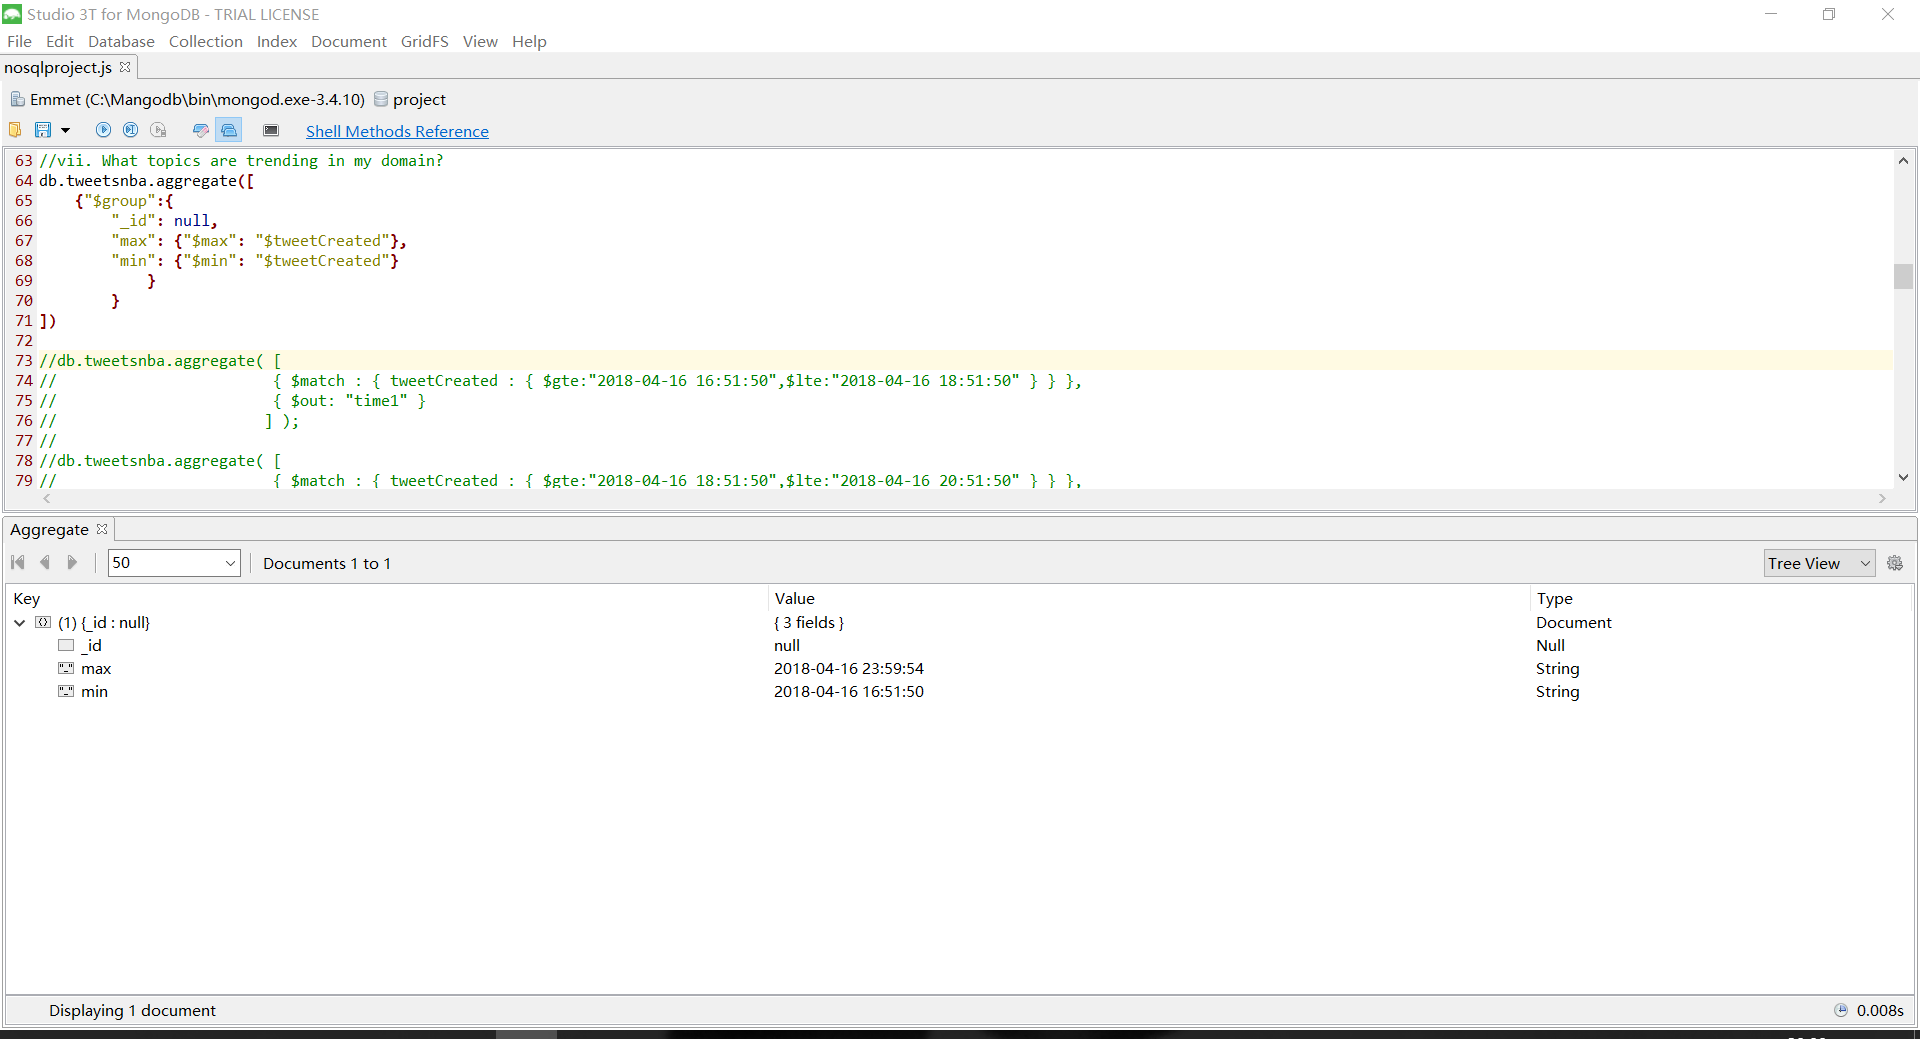

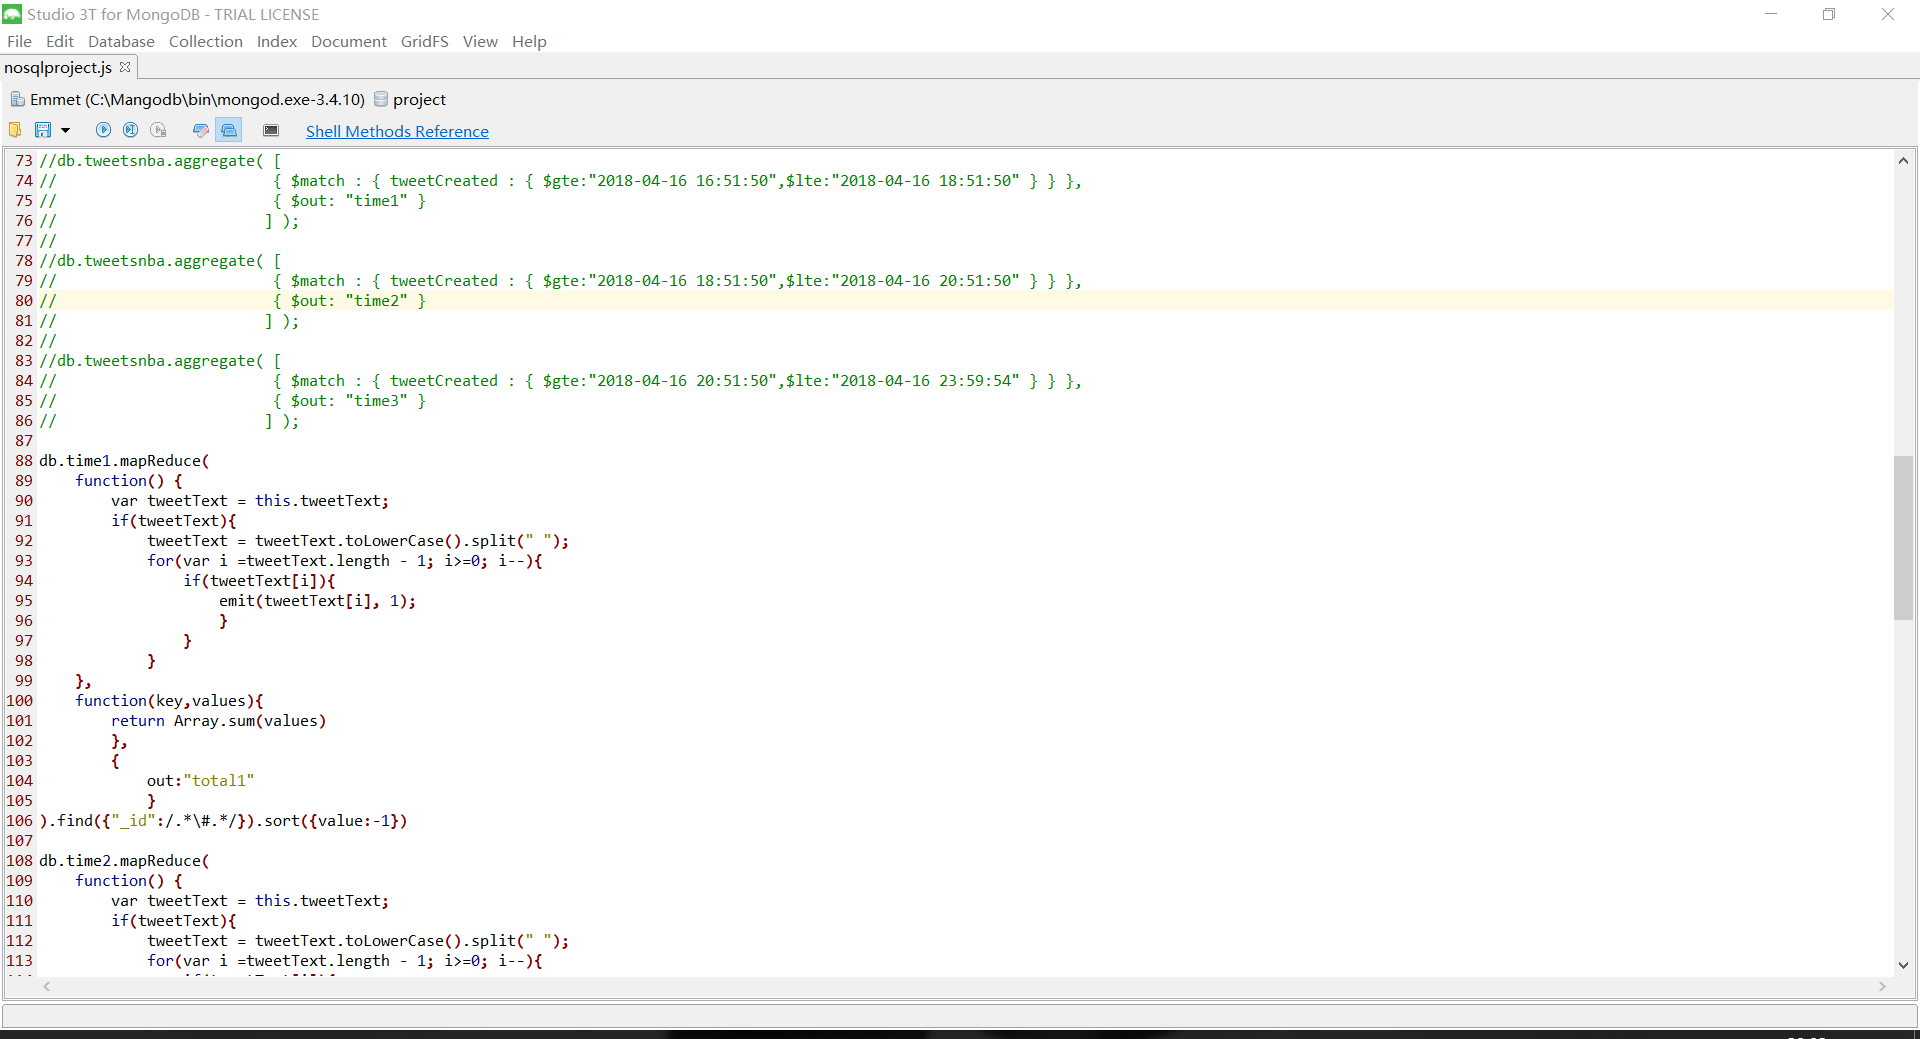

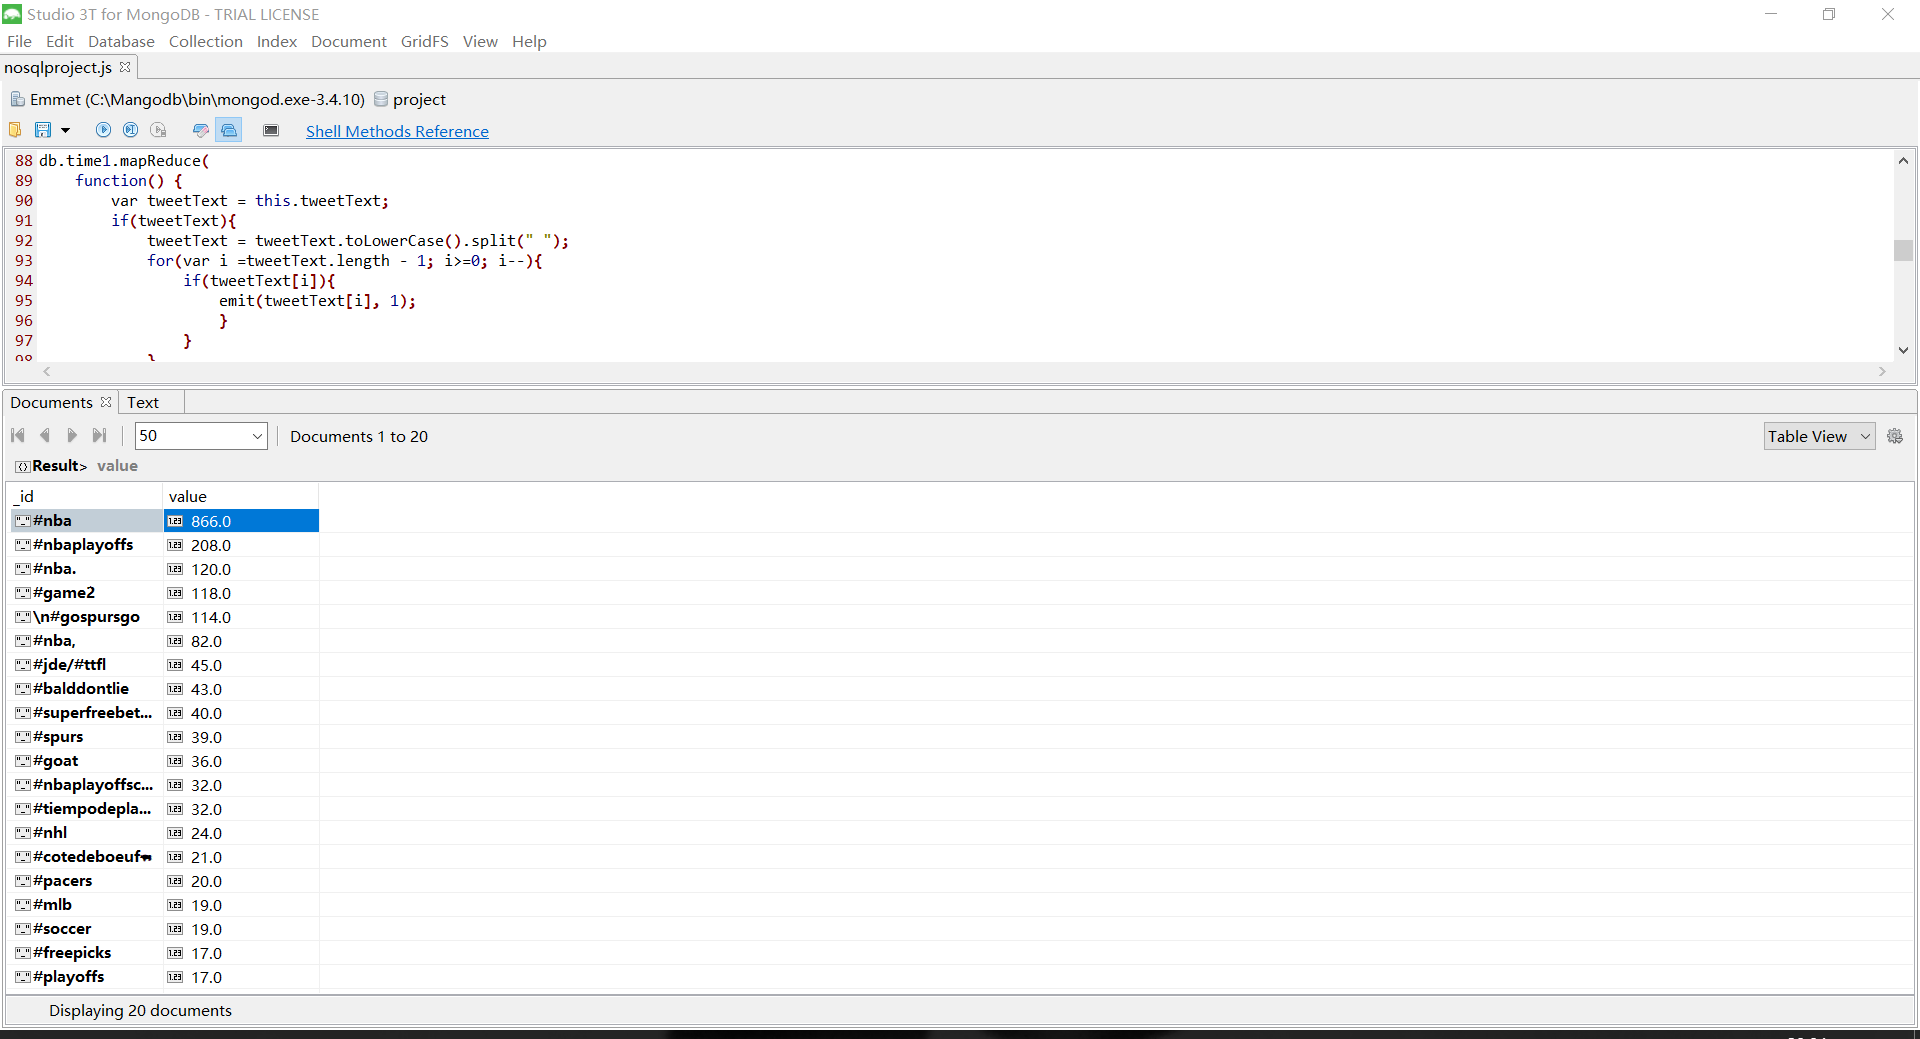

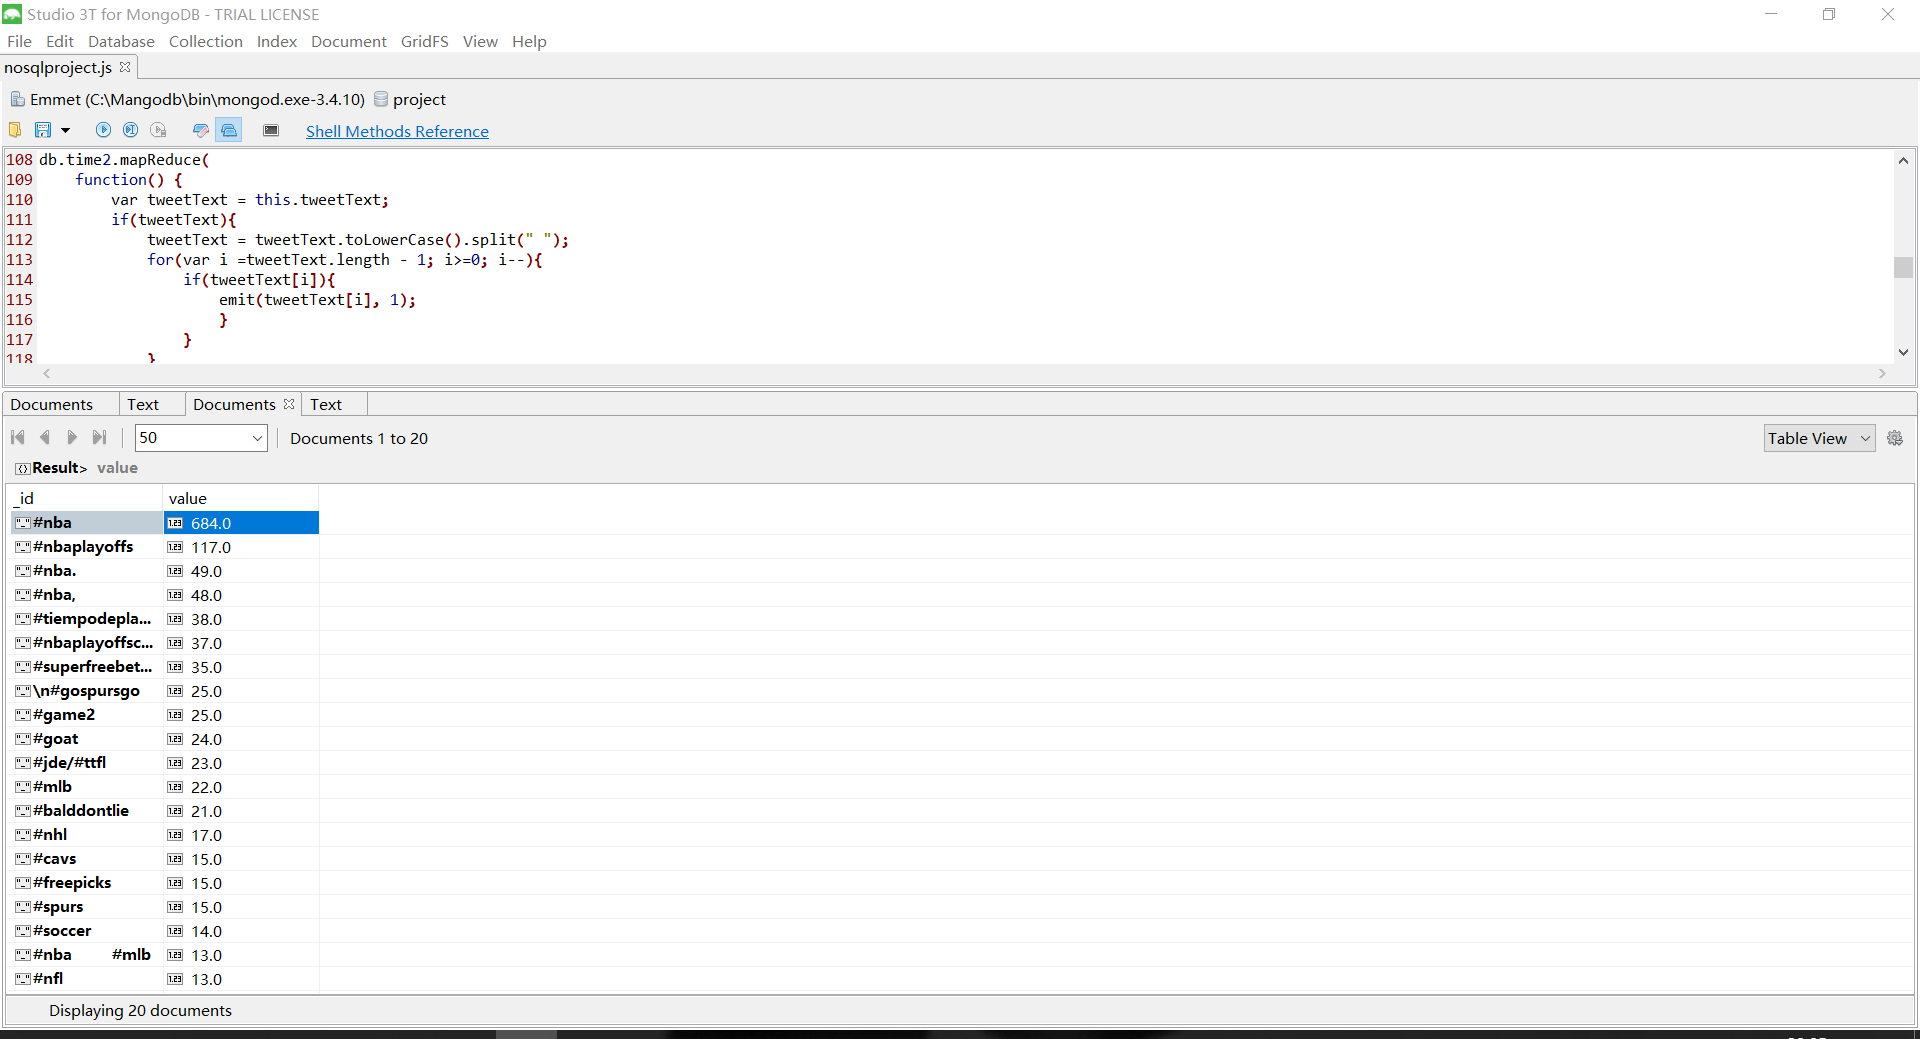

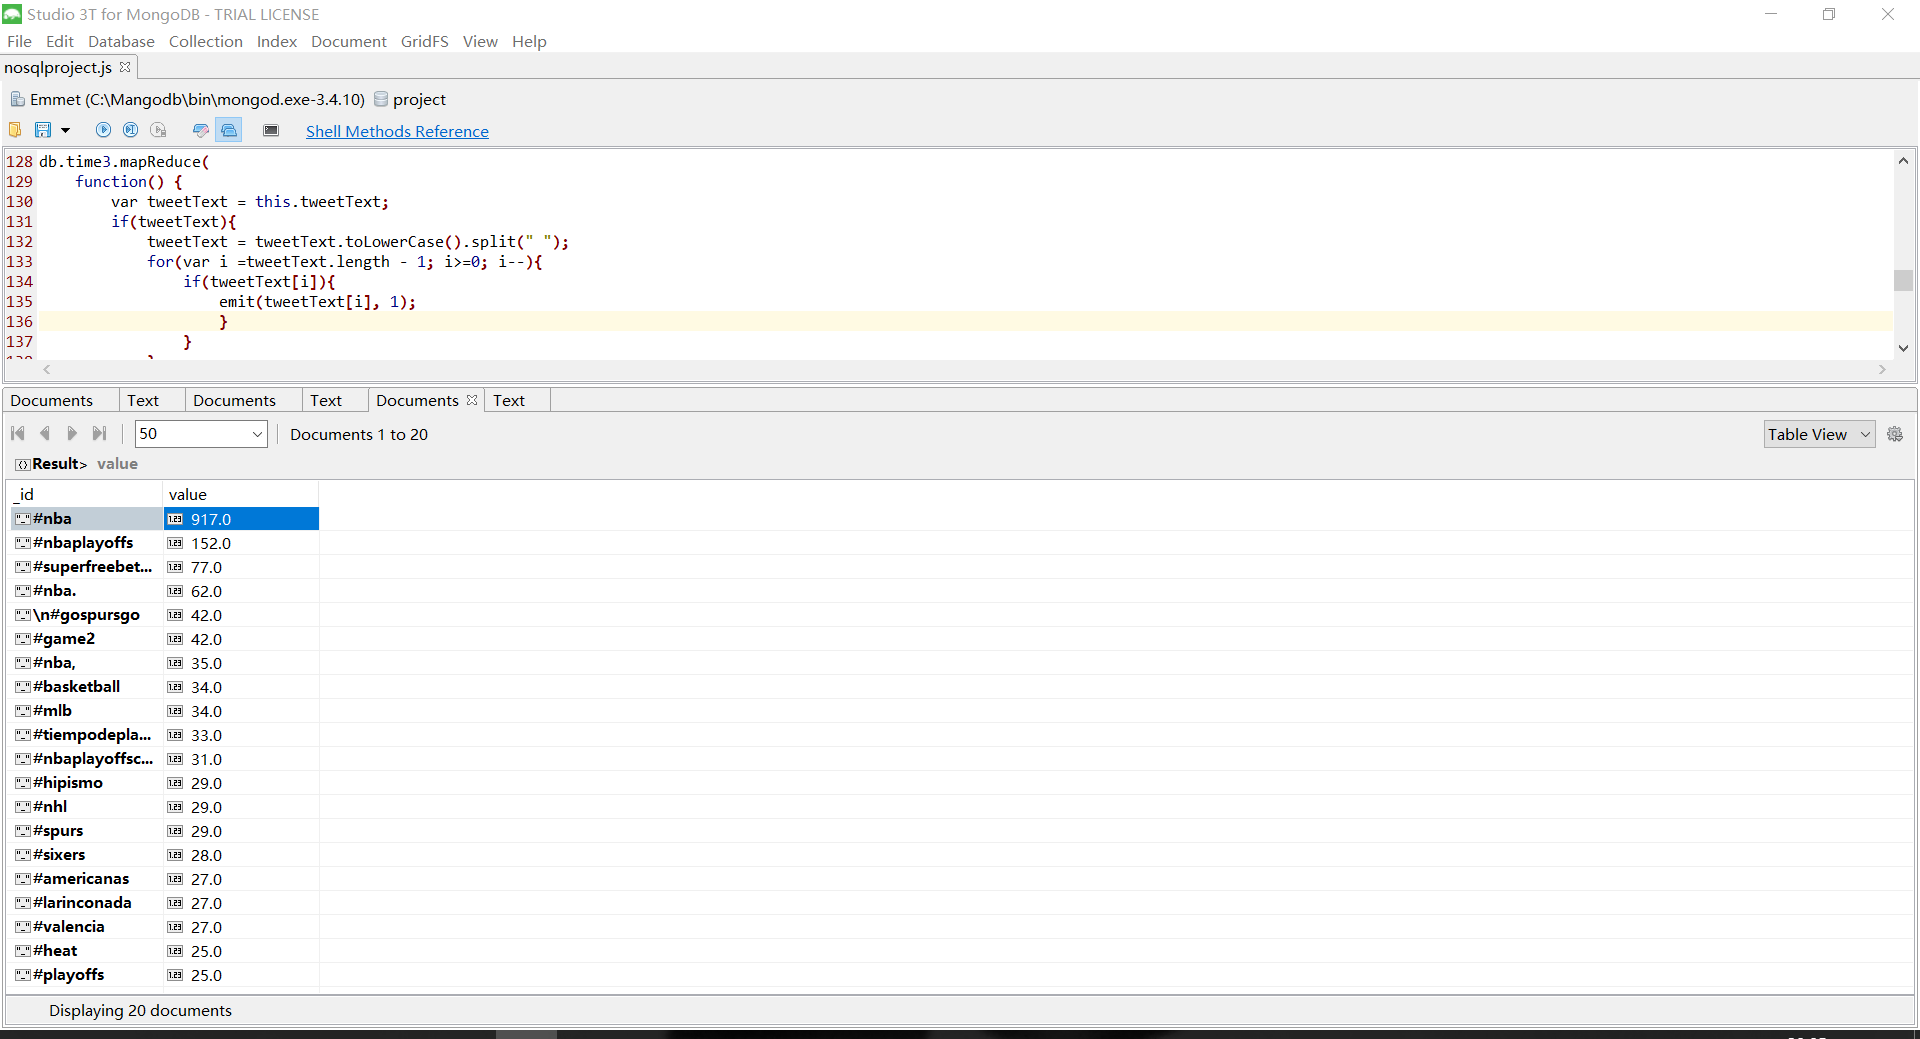

<h2>viii. What keywords/ hashtags should I add to my post?(Twitter)

<font color = blue>
* Our posts will get more popular if we post like the popular posts<br>
* The way to imitate the popular posts is to use the tags that they use


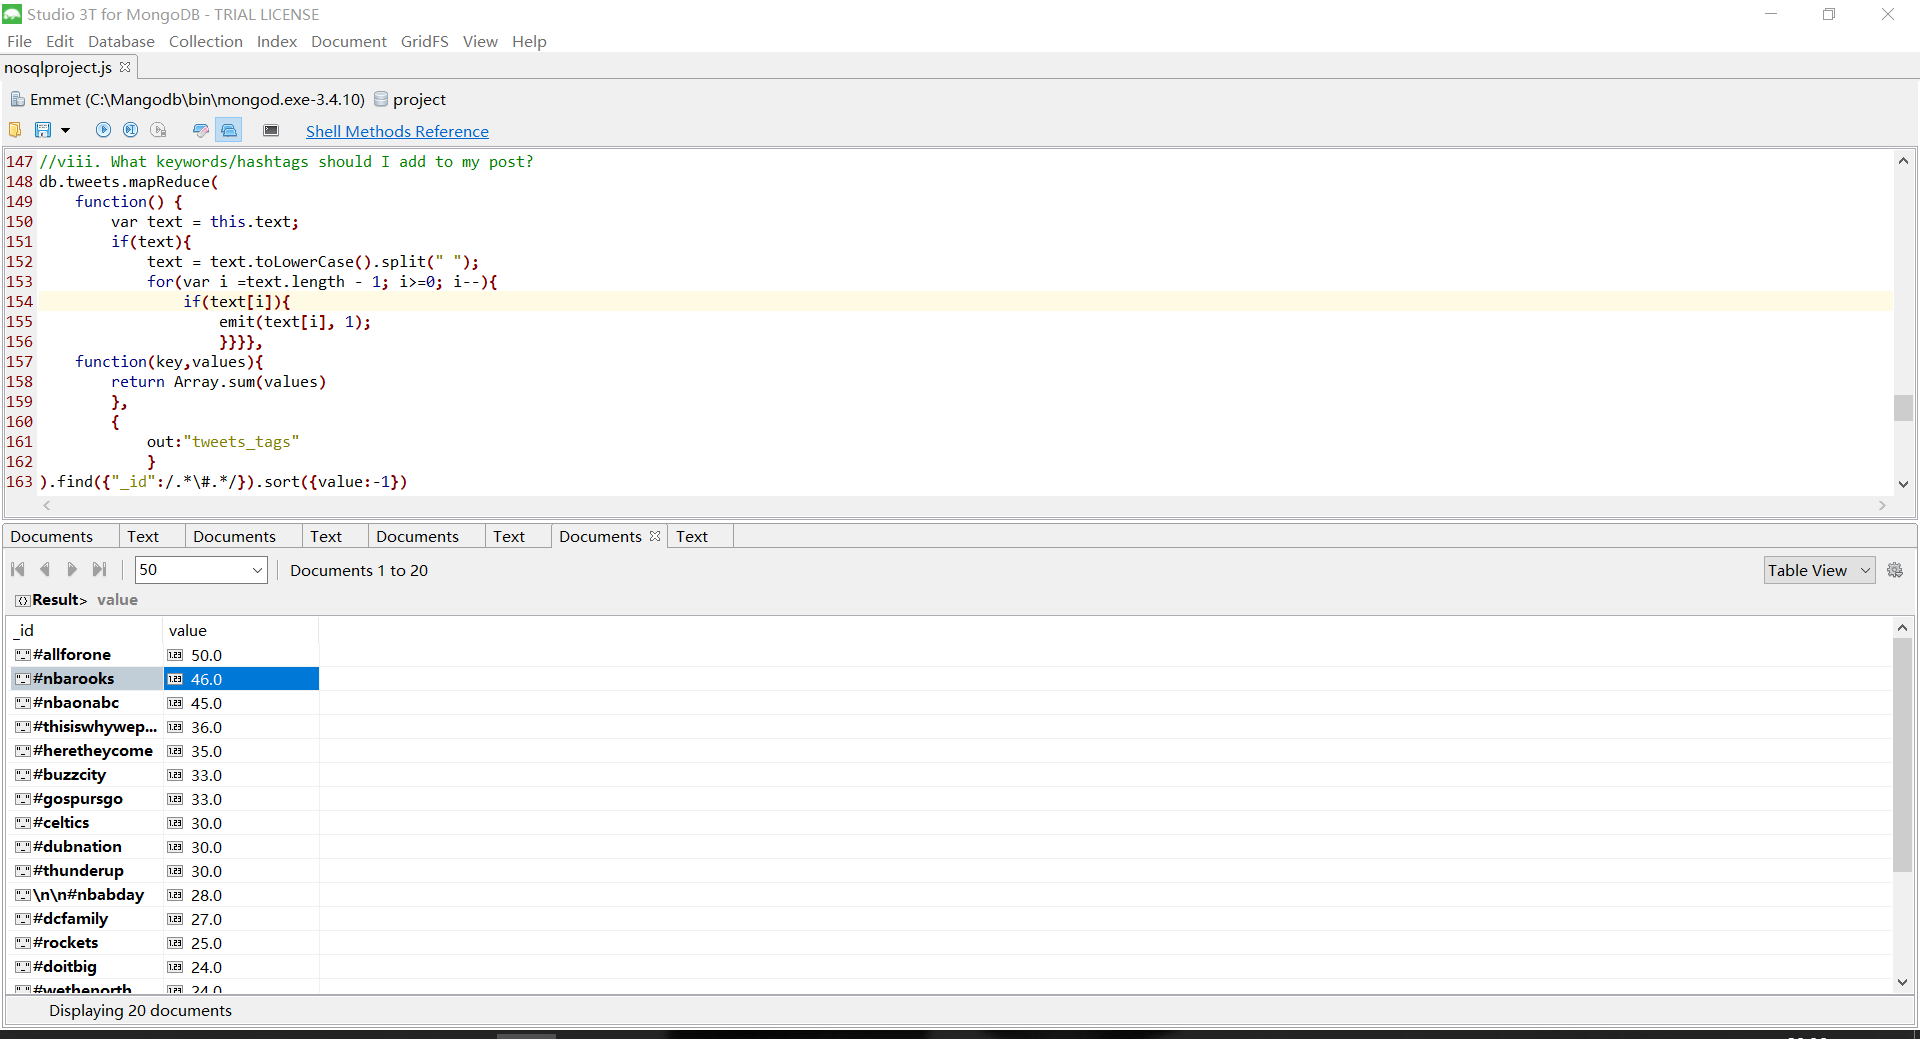


<h2>ix. Should I follow somebody back?（Twitter）

**<font color = blue>find all the folowers whose followers'count>1000 ,then sort them by followers count to see who are the most popular ones to follow.**



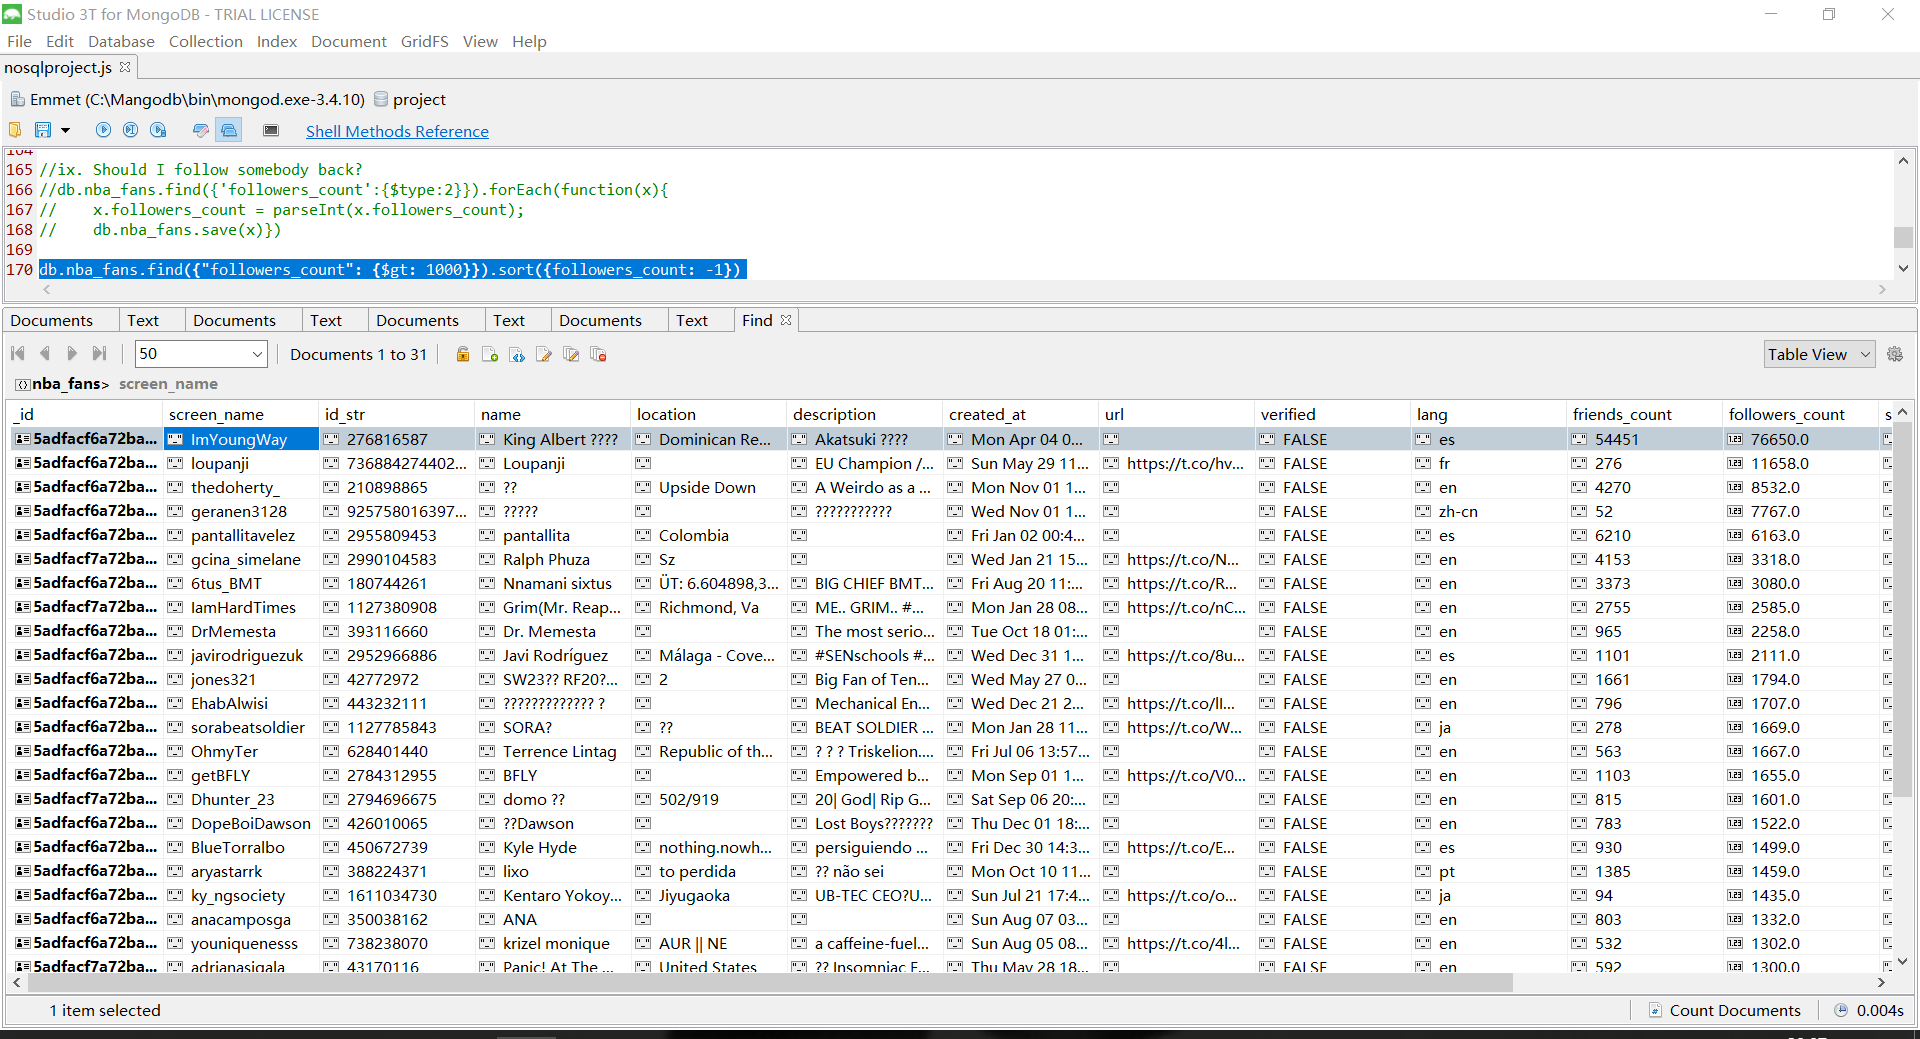

<h2>x. What is the best time to post?(Twitter)

<font color = blue>

**We should filter out the most popular posts that belong to your specific domain, and look at what time were they post at. That would be the “best time” for you to post**



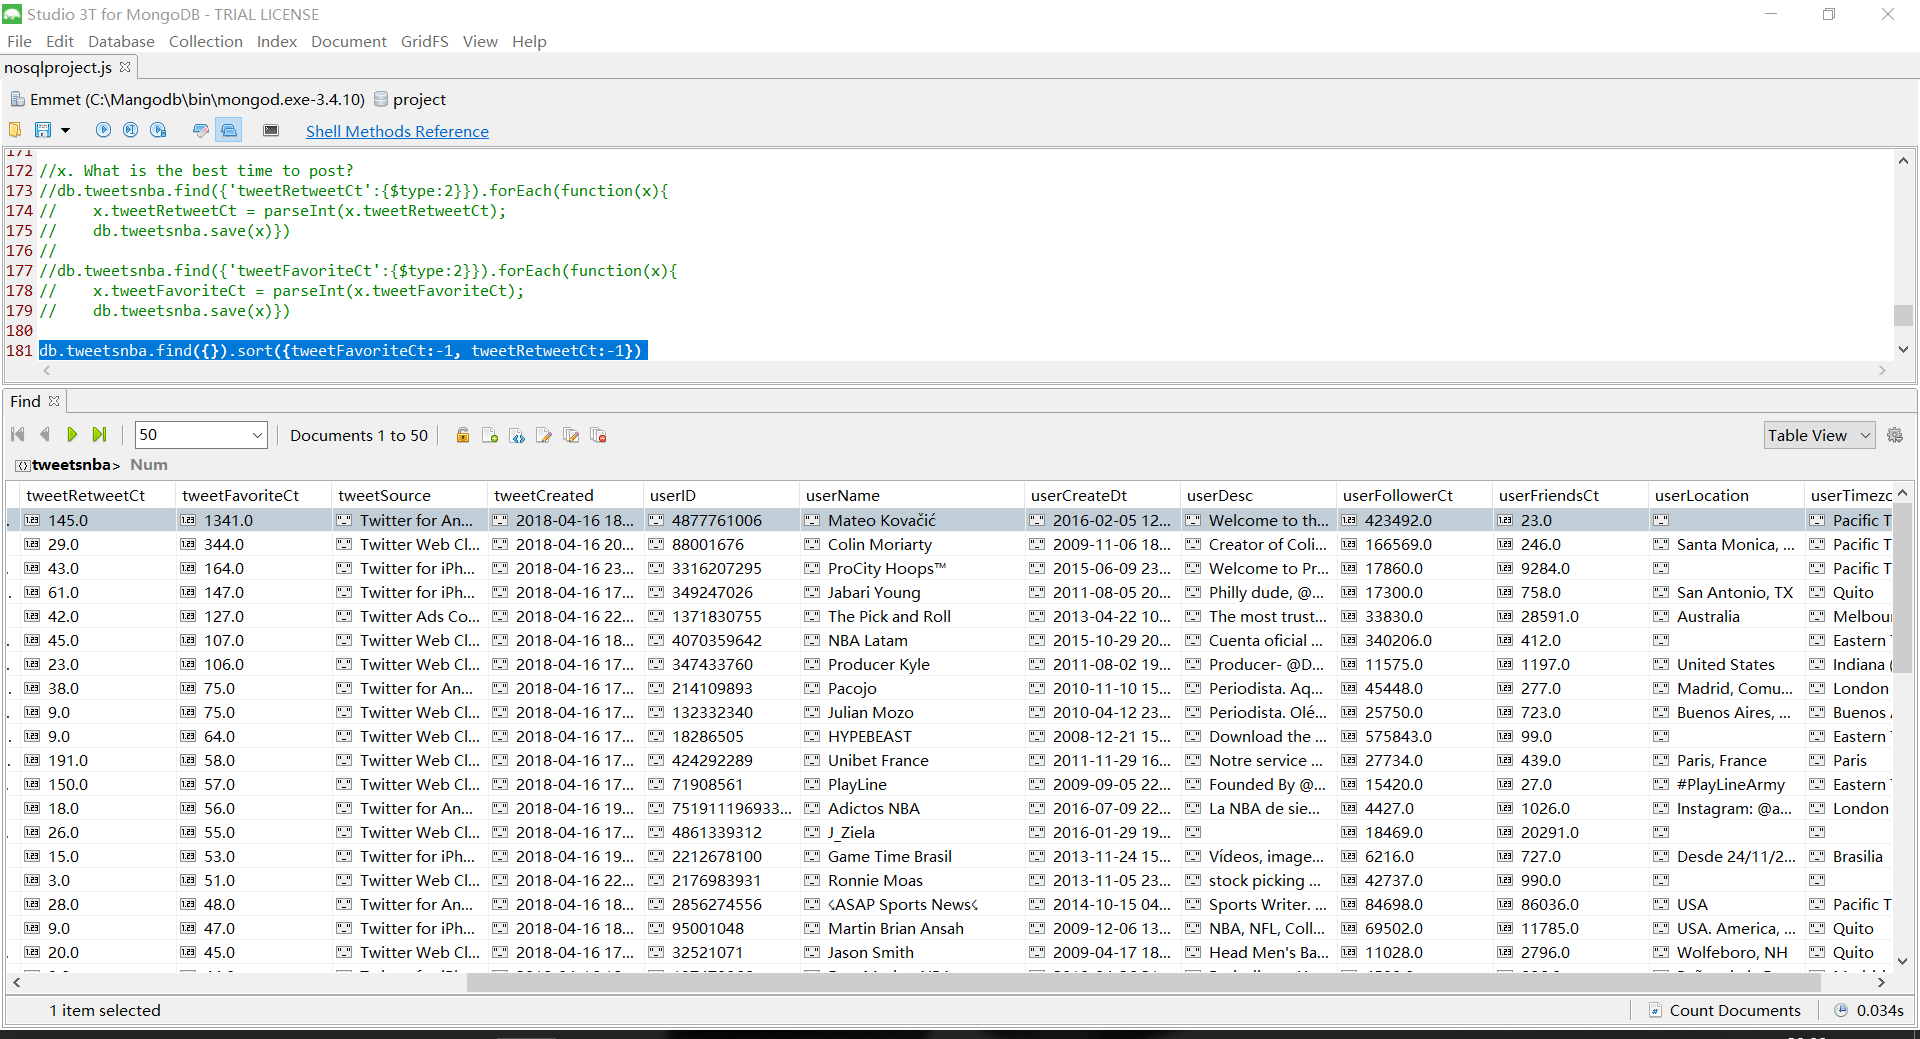

<h2>xi. Should I add an picture or url to my post?(Twitter)(Facebook)

<font color = red>**Compare the popularity of the posts with and without pictures/url, Note that the content of the post should be something that you want to post.**</font>




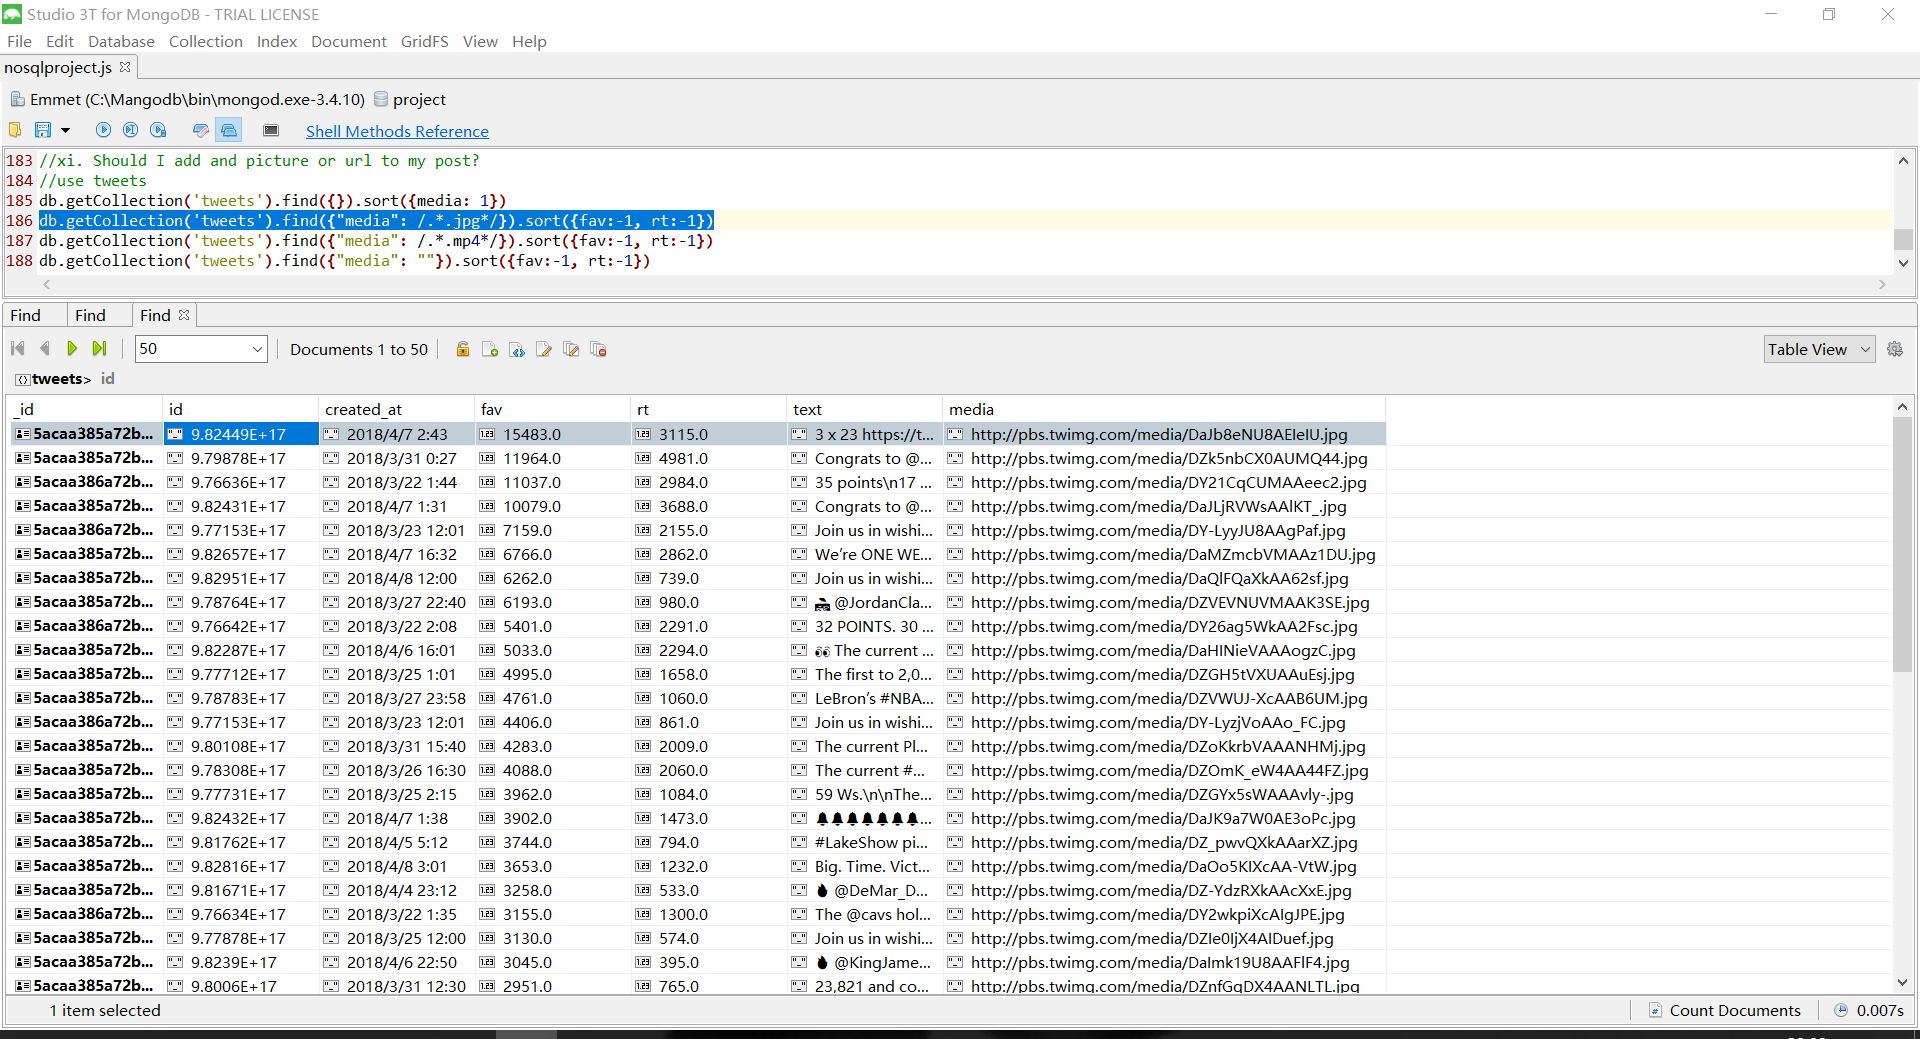

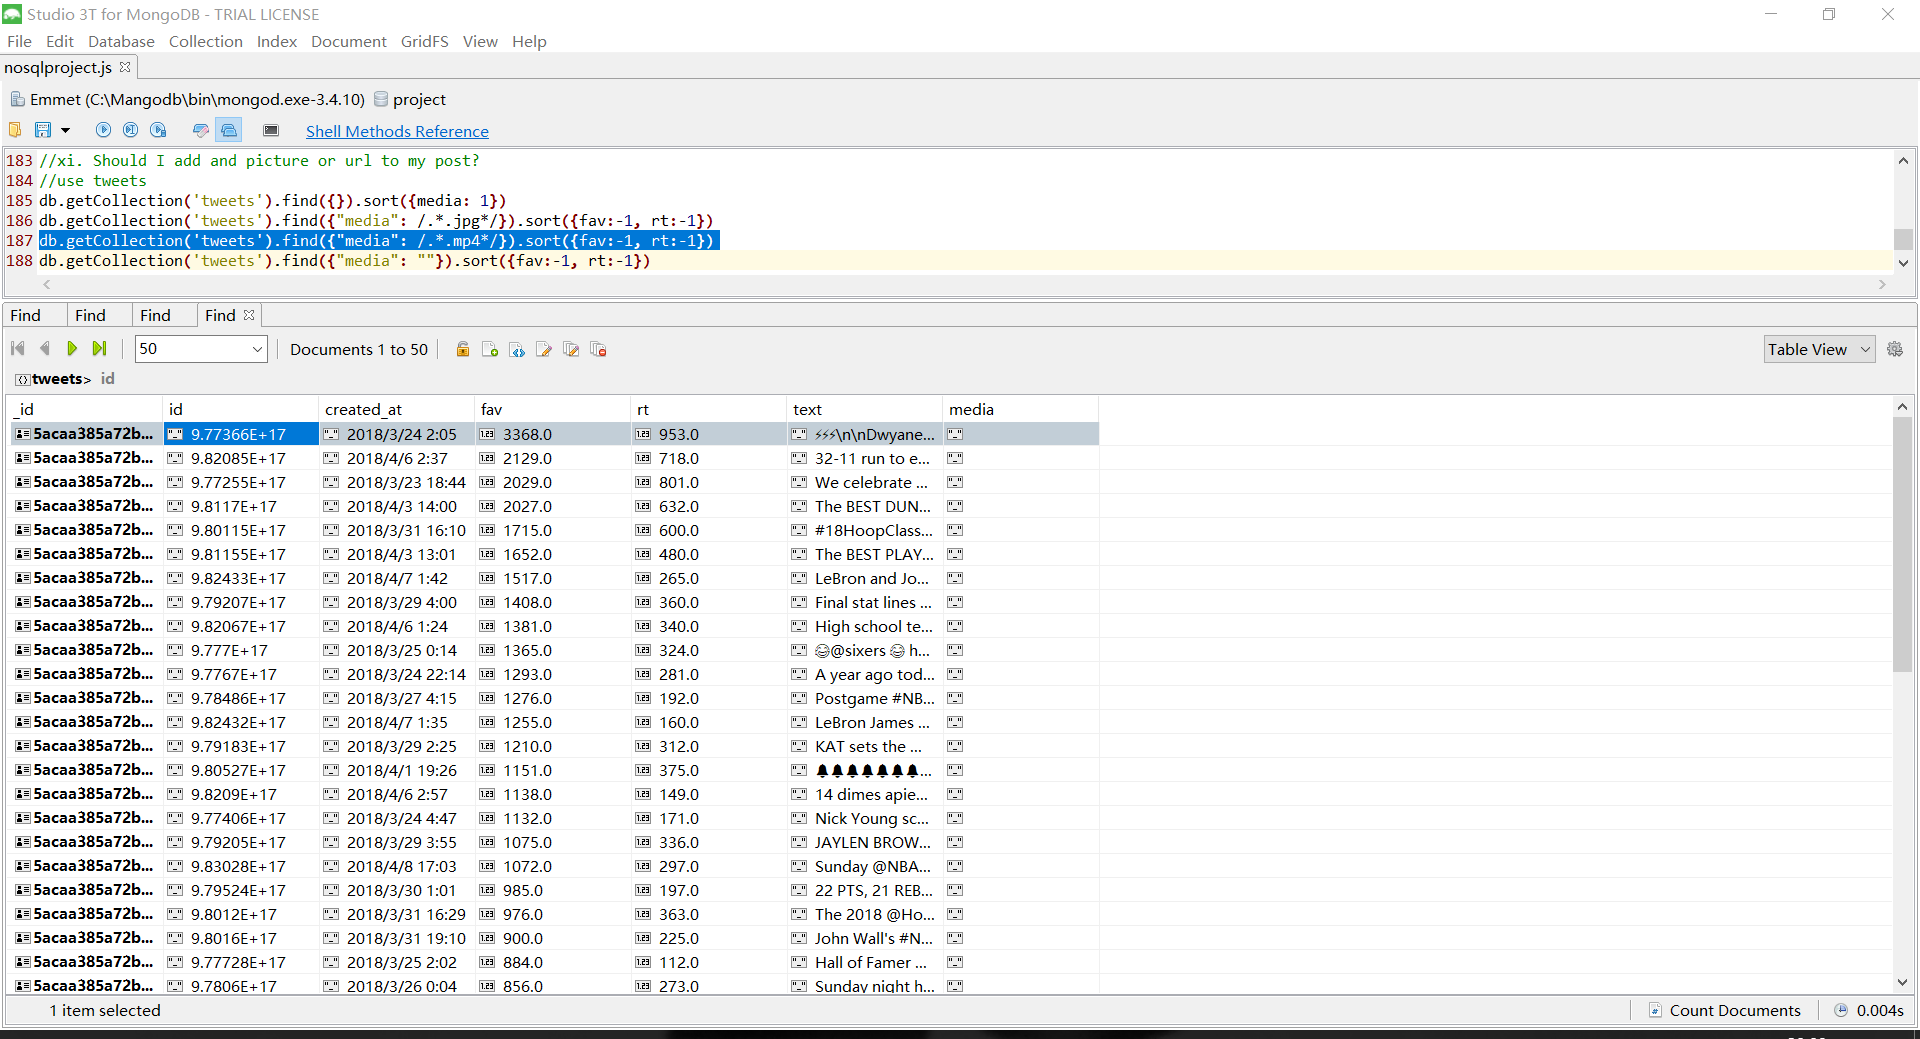

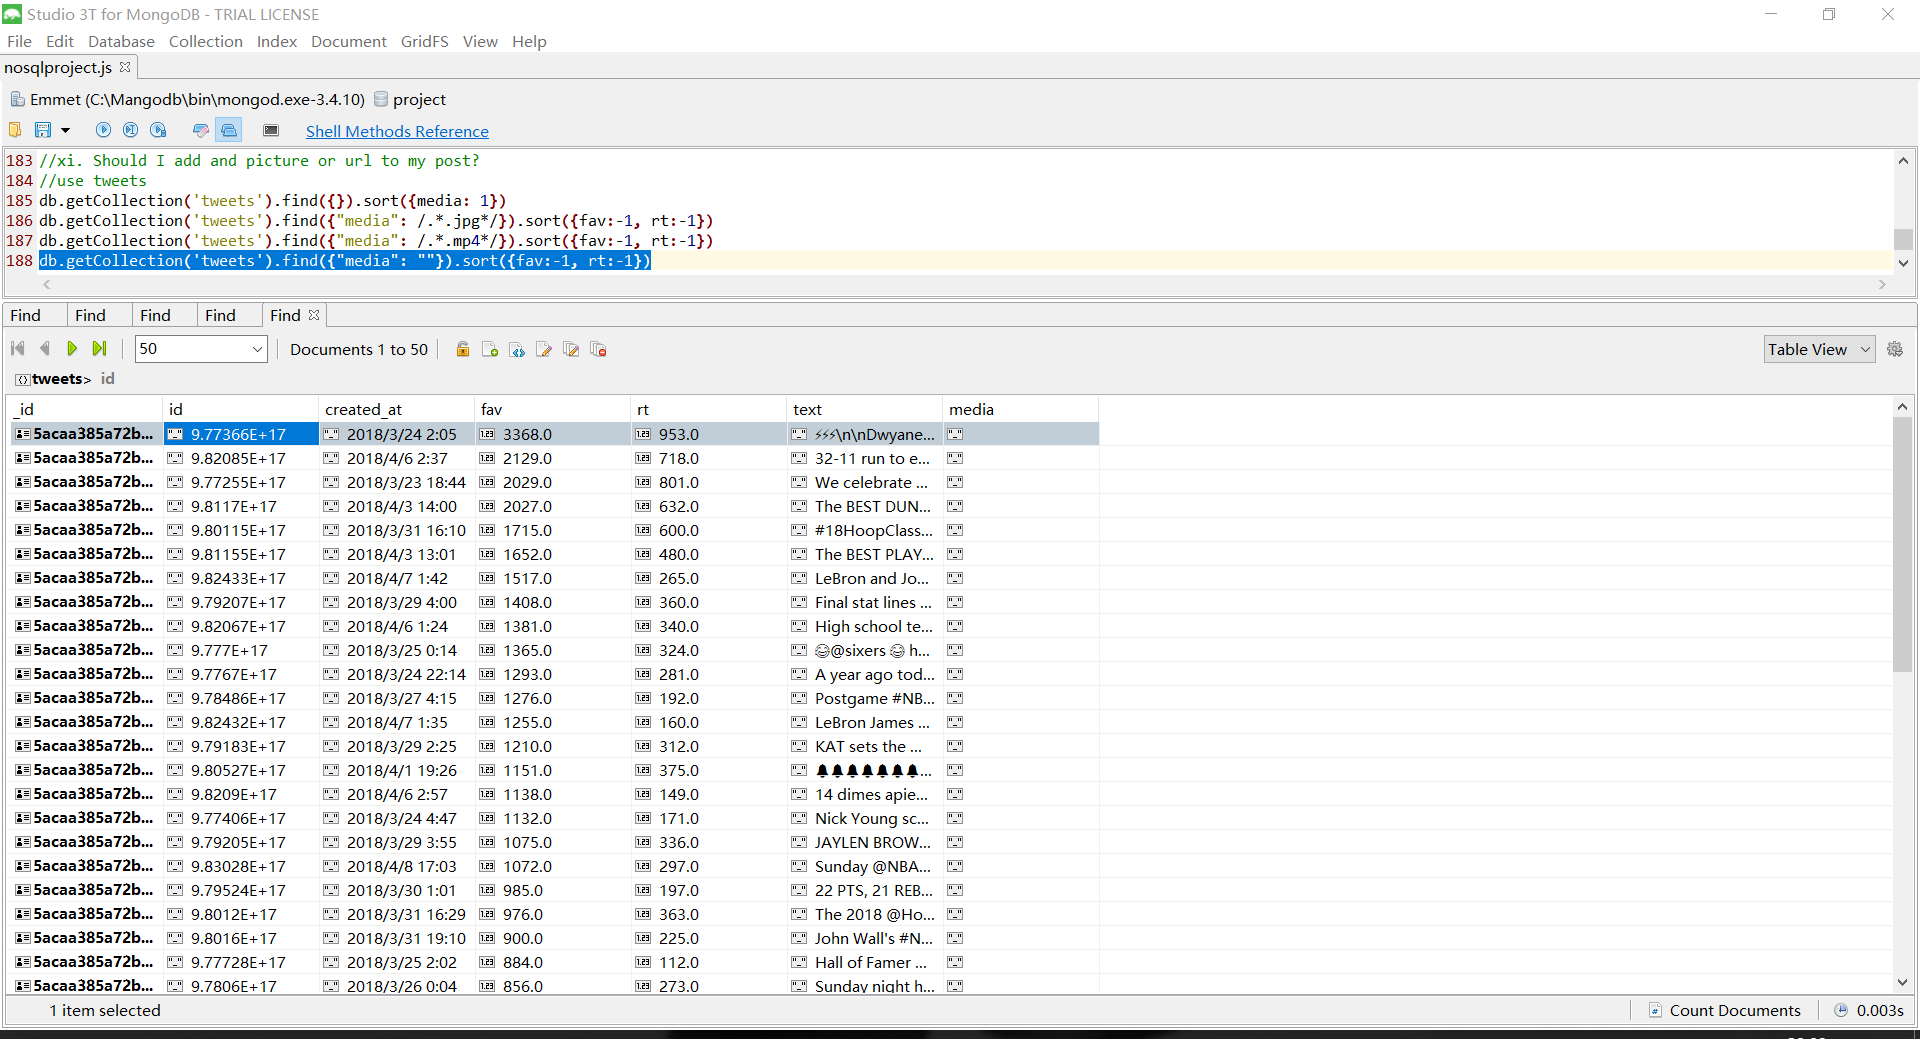

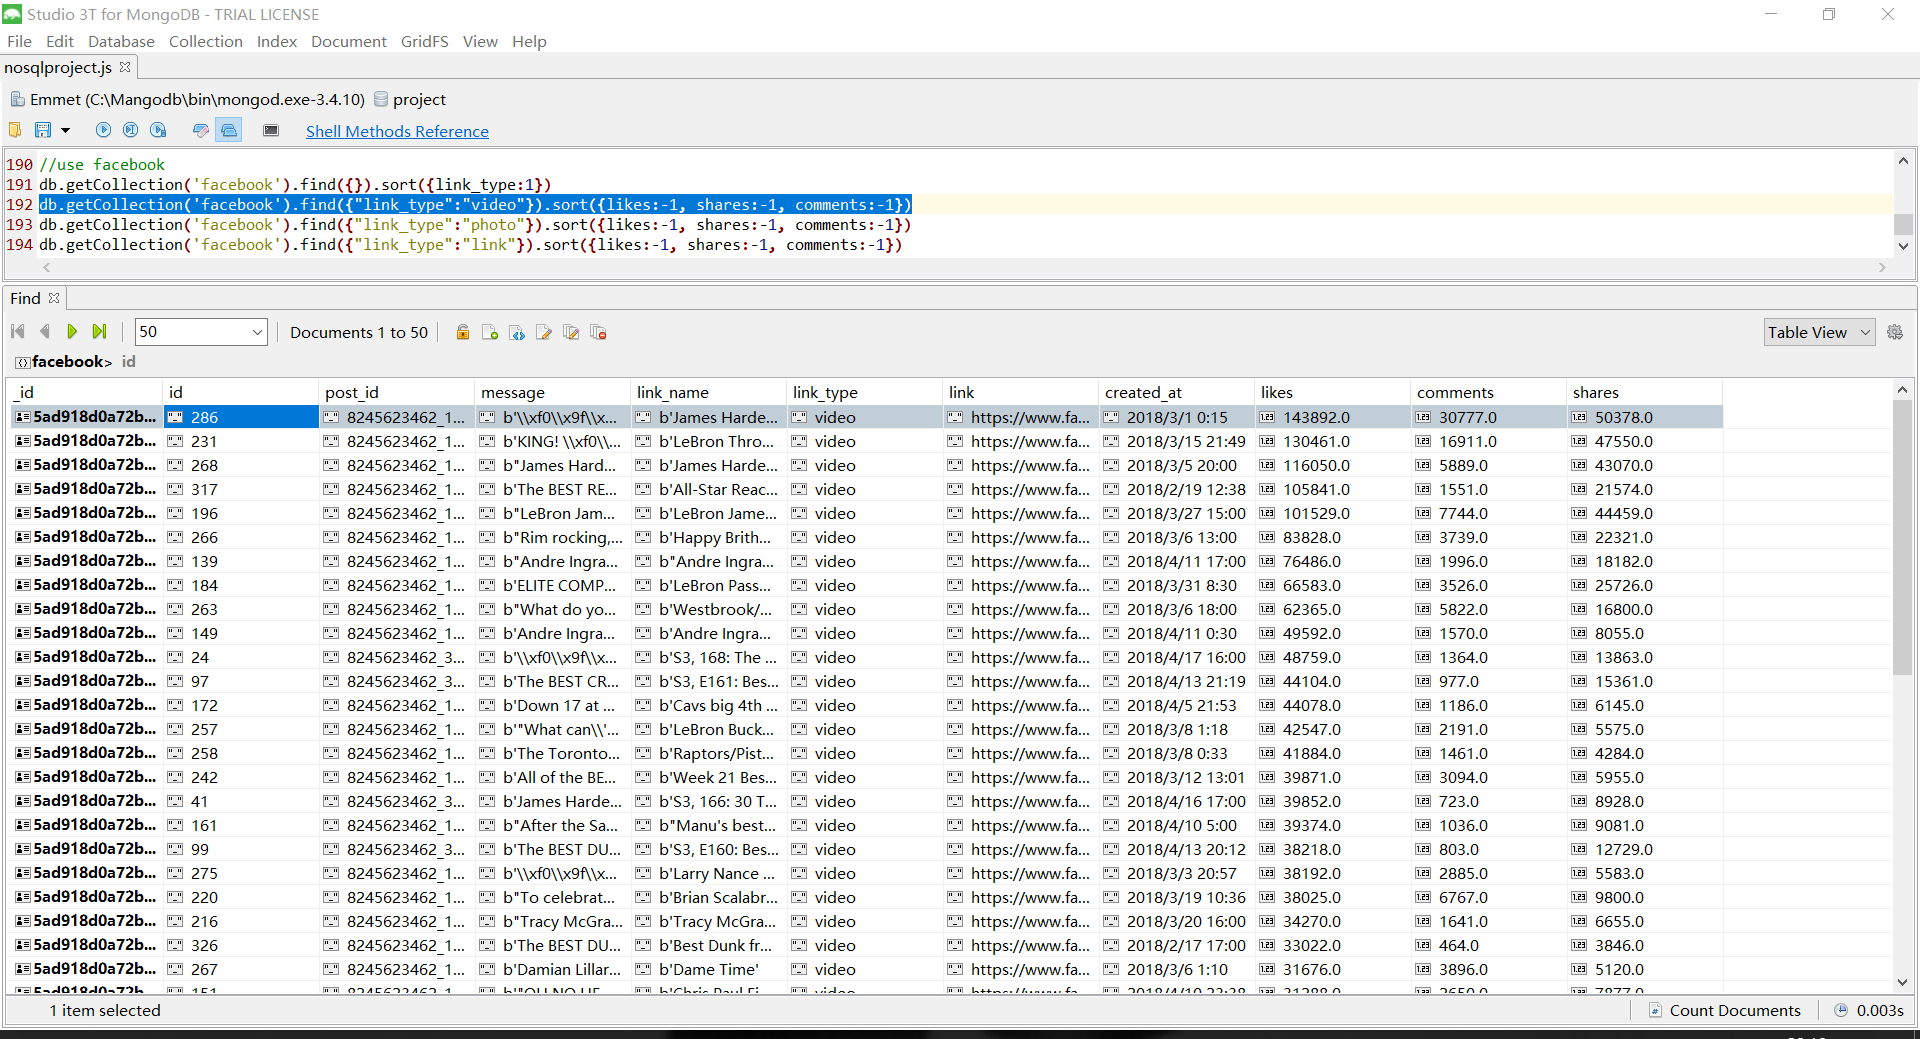

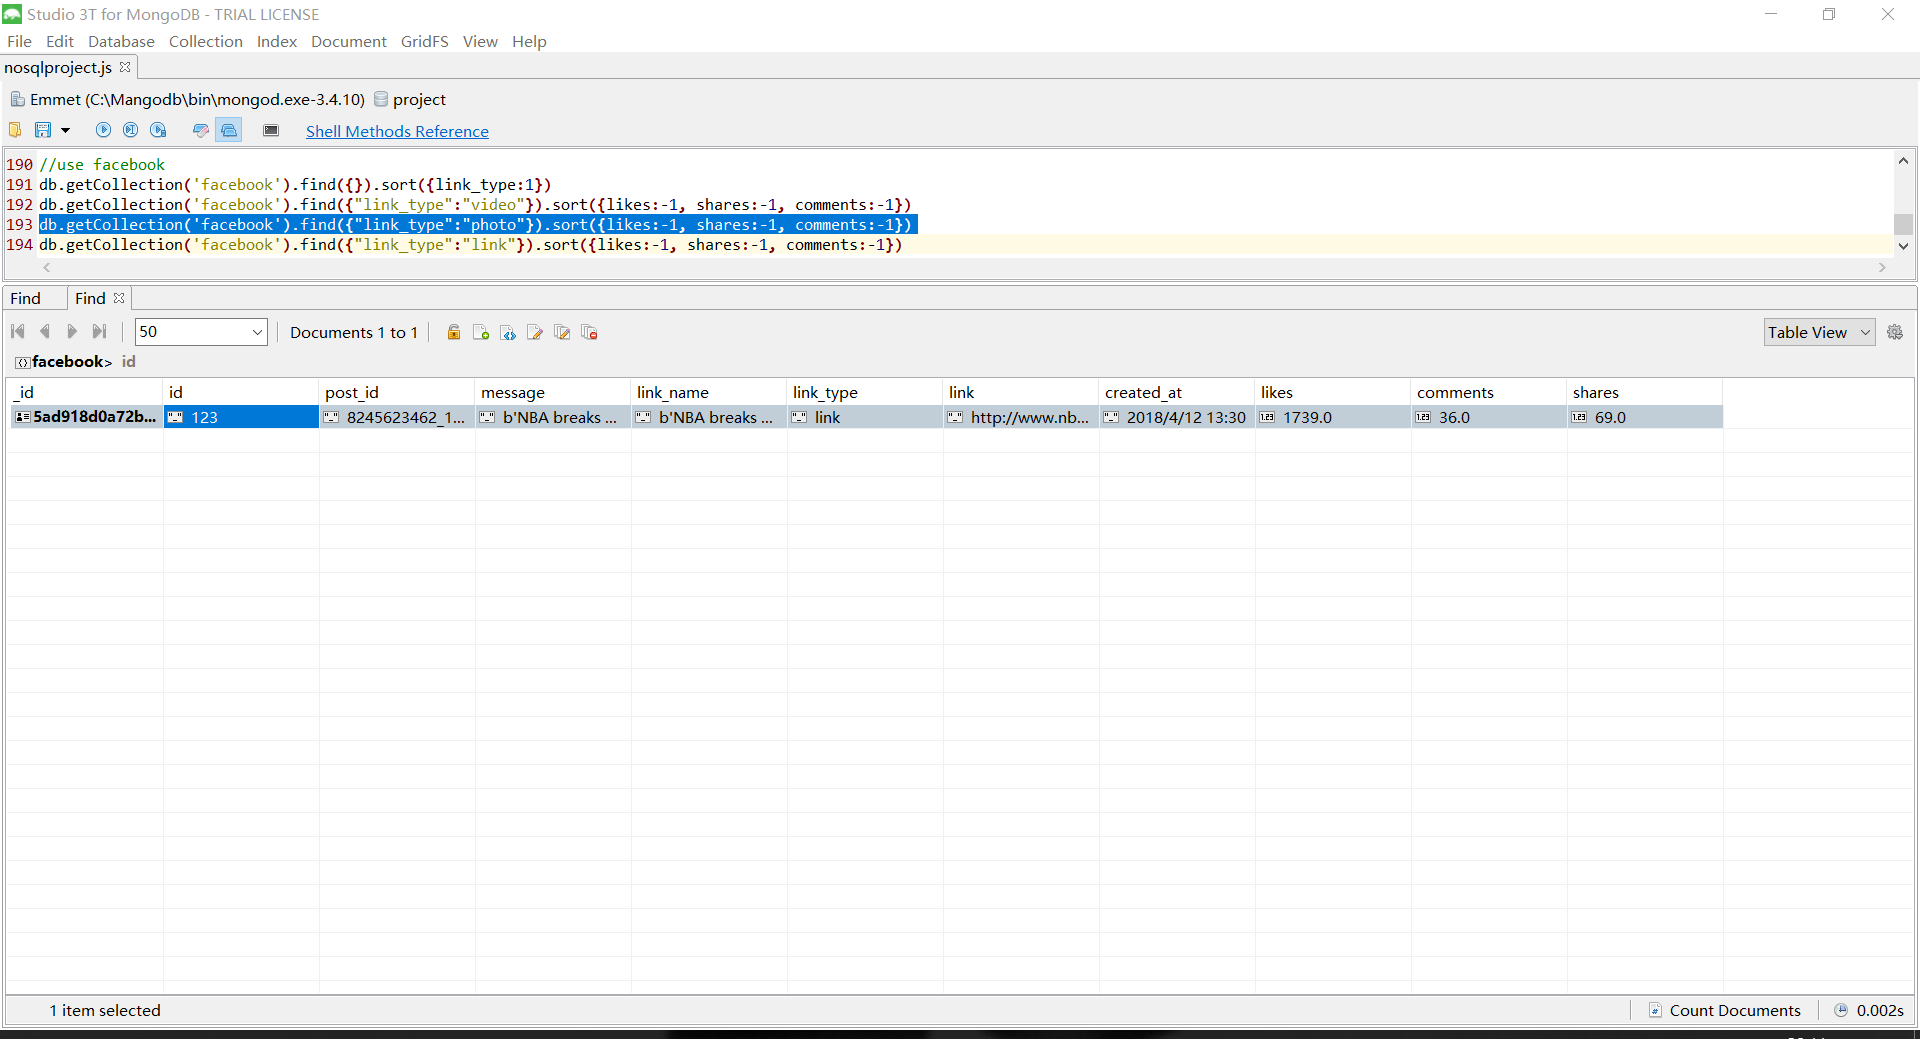

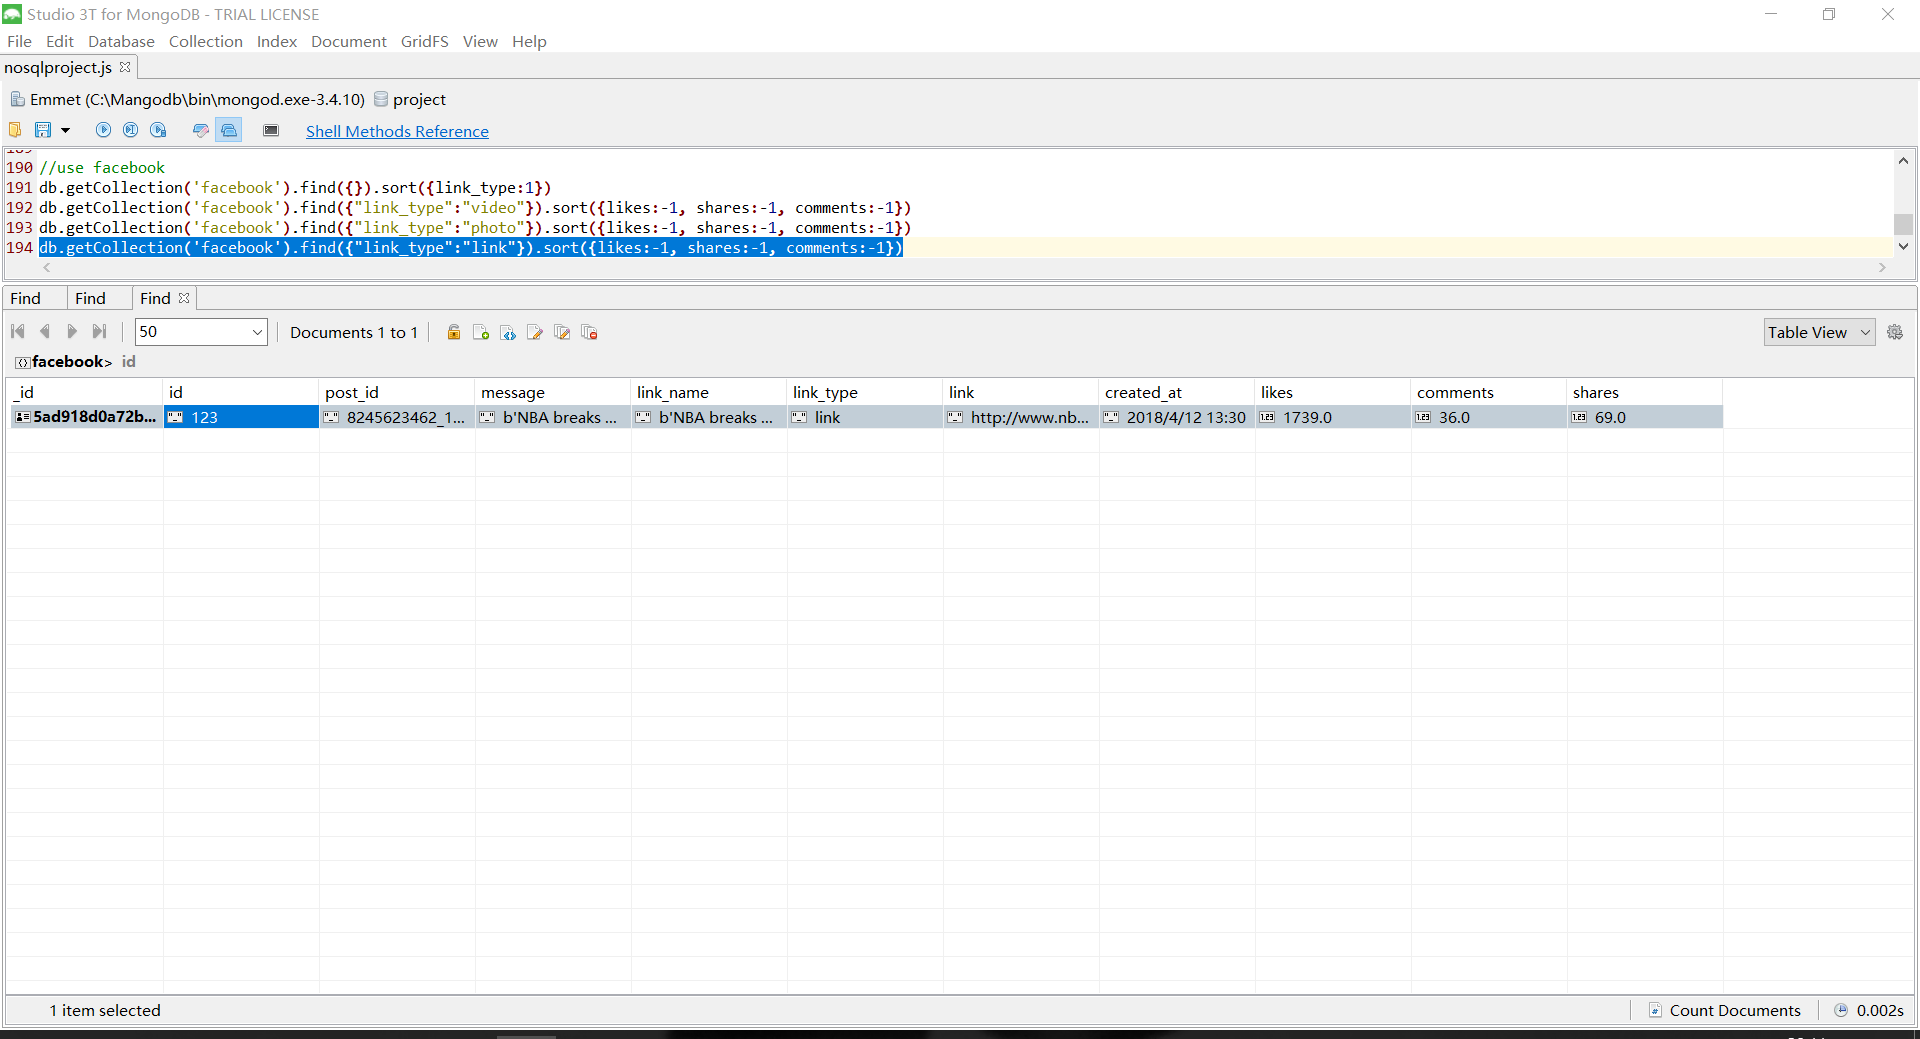

<h2>xiii. What’s my reach?(Twitter)(Facebook)

<font color = red>**Sort the fans of NBA homepage by location to find out the variety of the followers' location. We can see that lots of fans are foreign, like Chinese, European, Japanese, and etc.**</font>

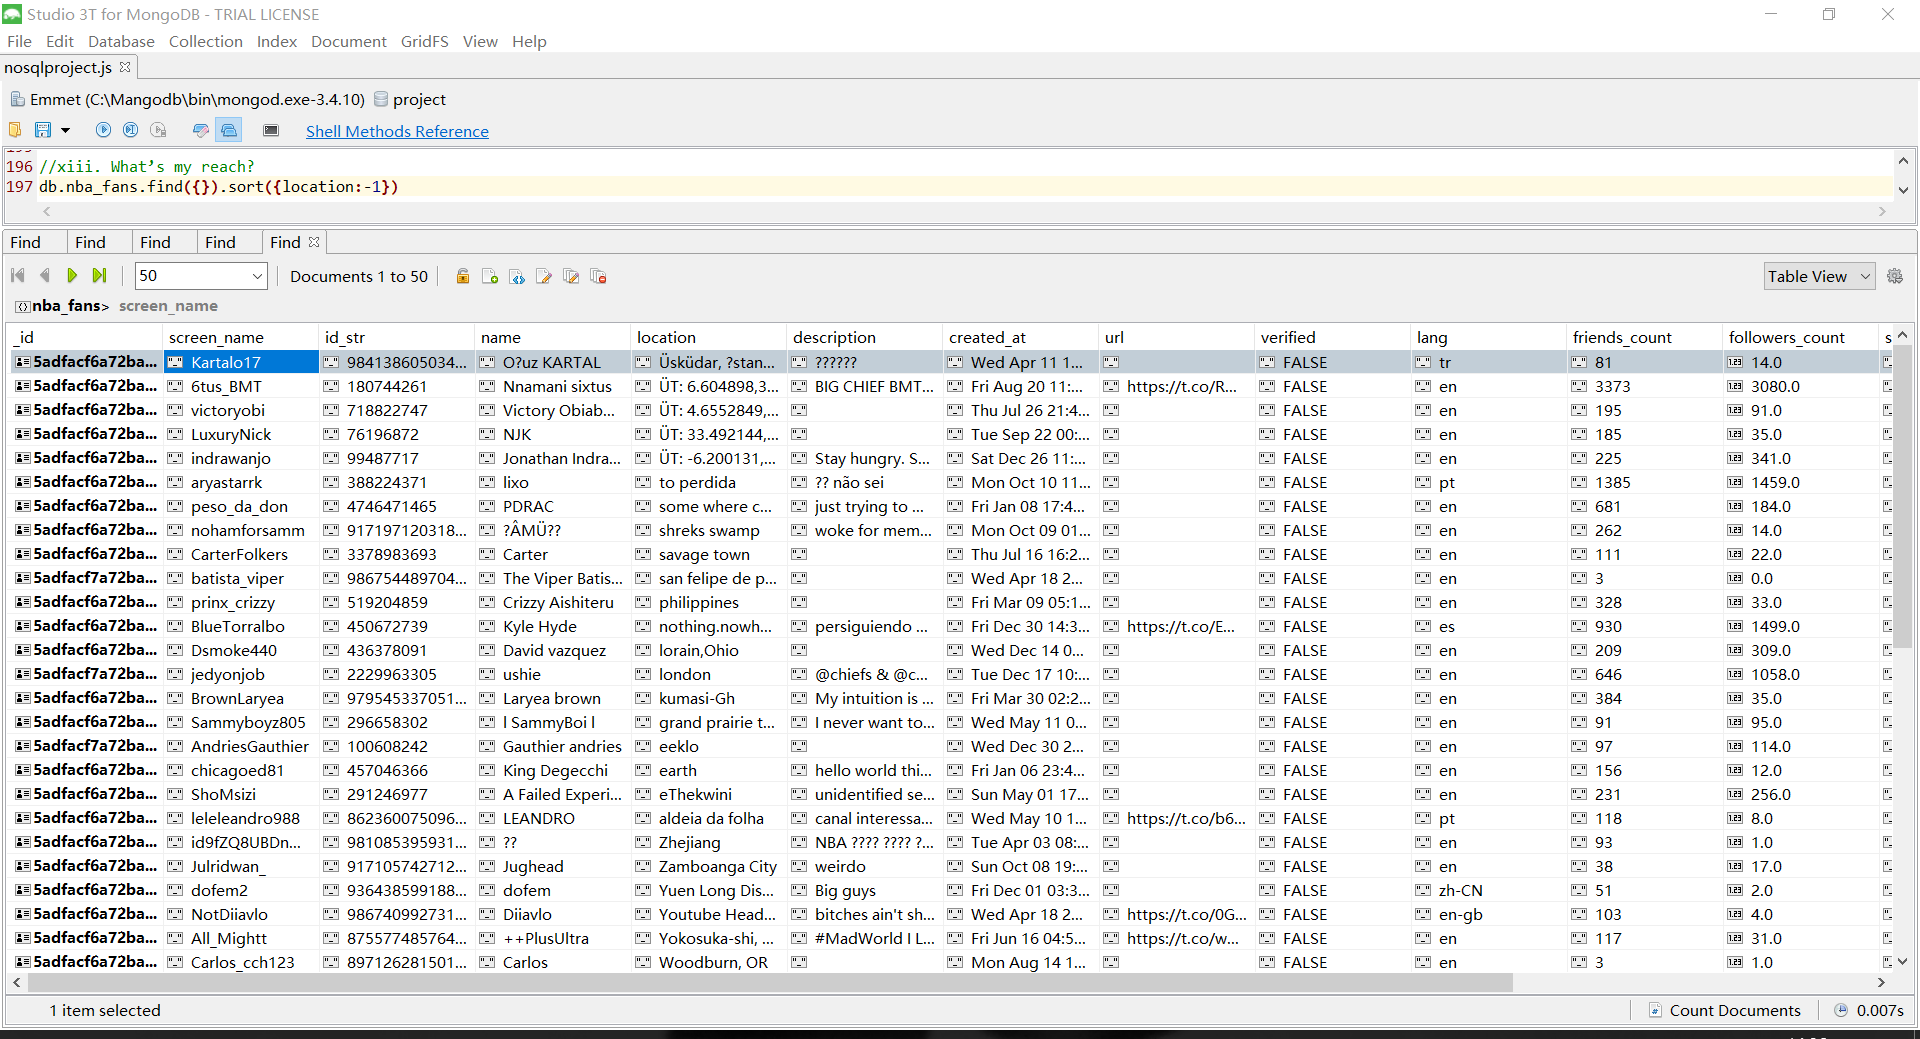